# Table of Contents:

1.- [Introduction](#Intro)  
2.- [EDA](#EDA)

[Using all the features](#allfeat)

3.- [Logistic Regression](#logreg1)  
&nbsp; &nbsp; 3.1- [Dataset without stalk-root](#logreg1.1)  
&nbsp; &nbsp; 3.2- [Raw dataset with missing values](#logreg1.2)  
&nbsp; &nbsp; 3.3- [Raw dataset treating "?" as another class](#logreg1.3)  
&nbsp; &nbsp; 3.4- [Dataset without rows with missing values](#logreg1.4)  
&nbsp; &nbsp; 3.5- [Imputing missing values](#logreg1.5)  
&nbsp; &nbsp; 3.6- [Features Importances](#logreg1.6)  
4.- [Decision Tree and Random Forest](#dtrf)  
&nbsp; &nbsp; 4.1- [Decision Tree](#dt)  
&nbsp; &nbsp; &nbsp; &nbsp; 4.1.1- [Dataset without stalk-root](#dt.1)  
&nbsp; &nbsp; &nbsp; &nbsp; 4.1.2- [Raw dataset with missing values](#dt.2)  
&nbsp; &nbsp; &nbsp; &nbsp; 4.1.3- [Raw dataset treating "?" as another class](#dt.3)  
&nbsp; &nbsp; &nbsp; &nbsp; 4.1.4- [Dataset without rows with missing values](#dt.4)  
&nbsp; &nbsp; &nbsp; &nbsp; 4.1.5- [Imputing missing values](#dt.5)    
&nbsp; &nbsp; 4.2- [Random Forest](#rf)  
&nbsp; &nbsp; &nbsp; &nbsp; 4.1.1- [Dataset without stalk-root](#rf.1)  
&nbsp; &nbsp; &nbsp; &nbsp; 4.1.2- [Raw dataset with missing values](#rf.2)  
&nbsp; &nbsp; &nbsp; &nbsp; 4.1.3- [Raw dataset treating "?" as another class](#rf.3)  
&nbsp; &nbsp; &nbsp; &nbsp; 4.1.4- [Dataset without rows with missing values](#rf.4)  
5.- [Support Vector Machine](#svm)  
6.- [K-Nearest-Neighbors](#knn)  
7.- [Naive Bayes](#NB)  
8.- [Clustering](#cluster)  
 
[Using only the easy-to-tell features](#easyfeat)

3.- [Logistic Regression](#logreg2)  
&nbsp; &nbsp; 3.1- [Dataset without stalk-root](#logreg2.1)  
&nbsp; &nbsp; 3.2- [Raw dataset with missing values](#logreg2.2)  
&nbsp; &nbsp; 3.3- [Raw dataset treating "?" as another class](#logreg2.3)  
&nbsp; &nbsp; 3.4- [Dataset without rows with missing values](#logreg2.4)  
&nbsp; &nbsp; 3.5- [Imputing missing values](#logreg2.5)  
&nbsp; &nbsp; 3.6- [Features Importances](#logreg2.6)  
4.- [Decision Tree and Random Forest](#dtrf1)  
&nbsp; &nbsp; 4.1- [Decision Tree](#dt1)  
&nbsp; &nbsp; &nbsp; &nbsp; 4.1.1- [Dataset without stalk-root](#dt1.1)  
&nbsp; &nbsp; &nbsp; &nbsp; 4.1.2- [Raw dataset with missing values](#dt1.2)  
&nbsp; &nbsp; &nbsp; &nbsp; 4.1.3- [Raw dataset treating "?" as another class](#dt1.3)  
&nbsp; &nbsp; &nbsp; &nbsp; 4.1.4- [Dataset without rows with missing values](#dt1.4)  
&nbsp; &nbsp; &nbsp; &nbsp; 4.1.5- [Imputing missing values](#dt1.5)    
&nbsp; &nbsp; 4.2- [Random Forest](#rf1)  
5.- [Support Vector Machine](#svm1)  
6.- [K-Nearest-Neighbors](#knn1)  
7.- [Naive Bayes](#NB1)  
8.- [Clustering](#cluster1)  

# 1. Introduction <a name="Intro"></a>

Various guides clearly state that there is no simple rule for determining the edibility of a mushroom. Normally, one needs to identify the name of the particular mushroom to be able to tell if it is edible or not. However, this task is very difficult and time consuming for non-experts, so we thought that a machine learning approach on mushroom data could shed light on some of the features that almost guarantee a mushroom will be poisonous. This way, novices can avoid wasting time trying to identify a mushroom that will most likely end up being poisonous, and focus on mushrooms that will most likely be edible instead.

We are going to use a dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/mushroom), which contains 8123 mushrooms records about 22 features, classified as poisonous or edible, drawn from the The Audubon Society Field Guide to North American Mushrooms, for two genus (Lepiota and Agaricus) from the Agaricaceae family. We hope to build various machine learning algorithms that can give perfect predictions, or at least no false negatives (identifying poisonous mushrooms as edible), and also identify the top features for better interpretability and generalization to other families of mushrooms.

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 

In [2]:
# Reads the data from the UCI Machine Learning Repository as a pandas DataFrame
mushrooms = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data")
# Names the columns of the pandas DataFrame 
columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
mushrooms.columns = columns

# 2. EDA <a name="EDA"></a>

In [3]:
mushrooms.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     e         x           s         y       t    a               f   
1     e         b           s         w       t    l               f   
2     p         x           y         w       t    p               f   
3     e         x           s         g       f    n               f   
4     e         x           y         y       t    a               f   

  gill-spacing gill-size gill-color   ...   stalk-surface-below-ring  \
0            c         b          k   ...                          s   
1            c         b          n   ...                          s   
2            c         n          n   ...                          s   
3            w         b          k   ...                          s   
4            c         b          n   ...                          s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 n          n       g  
1           o         p                 n          n       m  
2           o         p                 k          s       u  
3           o         e                 n          a       g  
4           o         p                 k          n       g  

[5 rows x 23 columns]

In [4]:
mushrooms.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

All the features on our dataset are categorical.

In [5]:
# Prints the number of rows for each class label
print(mushrooms["class"].value_counts())
# Computes the percentage of the edible class 
round(mushrooms["class"].value_counts()[0]/(mushrooms["class"].value_counts()[0]
                                    + mushrooms["class"].value_counts()[1])*100, 2)

e    4208
p    3915
Name: class, dtype: int64


51.8

We can see that there is a good balance between the two class labels. Before going any further, let's explore the meaning of our features. The sources for the images can be seen on the markdown text of the following cell. 

![m](http://i.imgur.com/k208z0y.jpg) ([Source](https://www.slideshare.net/rayborg/mushroom-tutorial)).

`cap-shape`: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s. 

![m](https://datascienceplus.com/wp-content/uploads/2018/02/mushroom-cap-shape.jpg)

`cap-surface`: fibrous=f, grooves=g, scaly=y, smooth=s.

![m](https://datascienceplus.com/wp-content/uploads/2018/02/mushroom-cap-surface.jpg)

`cap-color`: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y.

`bruises`: bruises=t, no=f. While identifying mushrooms, check for [bruising](https://www.mushroom-appreciation.com/identifying-mushrooms.html) by nicking the top and bottom of the cap and watching for any color change.  

`odor`: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s. 

`gill-attachment`: attached=a, descending=d, free=f, notched=n. 

![m](https://datascienceplus.com/wp-content/uploads/2018/02/mushroom-gill-attachment.jpg)

`gill-spacing`: close=c, crowded=w, distant=d. 

![m](https://datascienceplus.com/wp-content/uploads/2018/02/mushroom-gill-spacing.jpg)

`gill-color`: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y. 

`stalk-shape`: enlarging=e, tapering=t. 

![m](http://i.imgur.com/pvsTsOI.jpg)

`stalk-root`: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?. 

![m](https://datascienceplus.com/wp-content/uploads/2018/02/mushroom-stalk.jpg)

`stalk-surface-above-ring`: fibrous=f, scaly=y, silky=k, smooth=s.  

`stalk-surface-below-ring`: fibrous=f, scaly=y, silky=k, smooth=s.  

`stalk-color-above-ring`: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y.  

`stalk-color-below-ring`: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y.  

`veil-type`: partial=p, universal=u. Tissue that connects the stem and the cap before the gills are exposed. 

![m](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b7/1797-09-03_Agaricus_campestris_Plate_by_James_Sowerby.jpg/640px-1797-09-03_Agaricus_campestris_Plate_by_James_Sowerby.jpg)  

`veil-color`: brown=n, orange=o, white=w, yellow=y.

`ring-number`: none=n, one=o, two=t.

`ring-type`: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z. 

![m](https://datascienceplus.com/wp-content/uploads/2018/02/mushroom-ring-type.jpg)  

`spore-print-color`:  black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y. For most mushrooms, if the cap is cut off and placed gill-side-down overnight, a powdery impression reflecting the shape of the gills (or pores, or spines, etc.) is formed (when the fruit body is sporulating). The color of the powdery print, called a spore print, is used to help classify mushrooms and can help to identify them.  

`population`: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y.  

`habitat`: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d. 


As one could imagine, some of these features are more easy to identify than others. More specifically, the features that can be easily classified, in our opinion, are:
* Cap Shape
* Cap Color
* Bruises
* Gill Color
* stalk-shape
* stalk-root
* stalk color
* veil color
* ring number
* ring type
* spore print color
* population
* habitat

Some that could prove harder and a bit subjective, are:
* Cap Surface
* Gill attachement
* stalk-surface
* Odor
* Gill spacement.

Based on this list, we will first learn the models using all the features but later we will try to get a good enough model using only the easy features. We will also compute the feature importances using Logistic Regression and Random Forest. For now, let's continue with the EDA.

In [6]:
# Replaces "?" (UCI ML missing values are denoted by a question mark) with np.NaN across all datapoints of dataset
dataset = mushrooms.replace('?', np.NaN)
# Gets the number of missing values on each column
dataset.isna().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

As we can see, the only column with missing values is `stalk-root`. This is basically the type of root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? 

![m](https://datascienceplus.com/wp-content/uploads/2018/02/mushroom-stalk.jpg). 

Let's focus on this potentially problematic feature.

In [7]:
# Computes the contingency table for stalk-root and the class labels
stalk_root_edibility_table = pd.crosstab(index=dataset["class"], columns=dataset["stalk-root"])
stalk_root_edibility_table

stalk-root     b    c    e    r
class                          
e           1920  512  864  192
p           1856   44  255    0

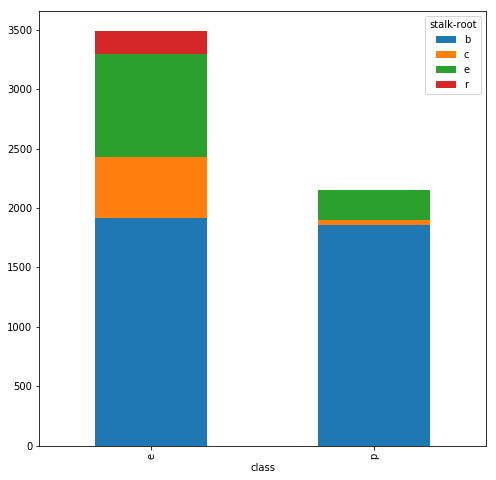

In [8]:
# Plots a stacked column chart for each class label 
stalk_root_edibility_table.plot(kind="bar", figsize=(8,8),stacked=True)
plt.show() 

Based on this, we can see that `stalk-root` is probably not one of the most powerfult predictors. The bulbous roots have the same proportion of class labels, and while the equal and club stalks are more prevalent on the edible mushrooms, it should not make much of a difference on the machine learning process. However, we can see that all the rooted mushrooms are edible, but the sample size is not big enough (about 2.3% of the total sample size) to be relevant. We could run a $\chi^2$-test, but it would not really shed much more light on the matter. Instead, we will implement our models on slightly different datasets and compare them. 

1. Dataset without column `stalk-root`.
2. Raw dataset with `?` as `np.NaN`.
3. Raw dataset (treating `?` as possible value of `stalk-root`).
4. Dataset without rows with missing values (losing 30% of our data).

Let's get these different datasets now, so we don't have to do it later.

In [9]:
# Gets the dataset without the problematic feature
mushrooms_no_stalk_root = mushrooms.drop("stalk-root", axis = 1)
# Gets the raw dataset with missing values as np.NaN
mushrooms_raw_NaN = mushrooms.replace("?", np.NaN)
# Gets the dataset without the rows containing missing values
mushrooms_without_NaN = mushrooms_raw_NaN.dropna()

We can also impute the missing values by mode imputation

In [10]:
dataset["stalk-root"].value_counts()

b    3776
e    1119
c     556
r     192
Name: stalk-root, dtype: int64

In [11]:
# Imputes the missing values on the dataset
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")
mushrooms_imputed = pd.DataFrame(imp.fit_transform(dataset), columns = columns)

NOTE: Uncomment and run the following cell if the above cell gives an error:

In [12]:
#mushrooms_imputed = mushrooms.replace("?", "b")

In [13]:
mushrooms_imputed["stalk-root"].value_counts()

b    6256
e    1119
c     556
r     192
Name: stalk-root, dtype: int64

but this is not such a good approach as the other values don't play any roll in the matter. A better approach would be to impute all classes on the same proportion as the non-missing data.

In [14]:
# Subsets the dataset to only get the rows with missing values
dataset_stalk_root_nan = dataset.iloc[
    dataset["stalk-root"][
    dataset["stalk-root"].isna()
].index
] 

In [15]:
dataset_stalk_root_nan["class"].value_counts()

p    1760
e     720
Name: class, dtype: int64

We can see that the rows with missing values are more of the poisonous class than of the edible... Thus, we should try to take this into account. Out of all the missing rows, 29 % would need to follow the dataset with only edible records distribution, while 71% would follow the poisonous dataset subset distribution, but the issue is that we don't know which ones are which, so the chance of imputting a wrong missing value is higher than with the mode, where we at least are guranteed to impute a percentage of values correctly (given they follow the same distribution). Thus, we will stick with the mode imputation approach.

# Using all features <a name="allfeat"></a>

# 3. Logistic Regression <a name="logreg1"></a>

In this section we will implement the Logistic Regression model from [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

As we are going to be doing basically the same process on different datasets, let's define some functions now.

In [17]:
def preprocess(data):
    """
    Preprocesses the input dataset and returns the training and testing data to pass on the clasiffiers
    data: dataset to be used to learn the model (DataFrame with predictor features and target)
    """
    # Gets the predictor features 
    X = data.drop(["class"], axis=1)
    # And encodes them (they are all categorical)
    X = pd.get_dummies(X).values
    # Gets the target feature (binary)
    y = data["class"].values

    le = LabelEncoder()
    # Encodes the target
    y = le.fit_transform(y)

    # Splits between training and testing, stratifying by the target variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)
    
    # No need to standardize as we only have 1s and 0s for all of our variables (they are all categorical).
    # This also makes it easier to interpret the decission tree in the next section 

    return X_train, y_train, X_test, y_test

def train_and_test(model, train_data, test_data):
    """
    Trains the model on the training data, prints the score for such model evaluating it on the testing data
    and also returns the learned model
    model: classifier to be used
    train_data: [X_train, y_train]
    test_data: [X_test, y_test]
    """
    # Fits the model to the training data 
    model.fit(train_data[0], train_data[1])
    # Evaluates the model using the testing data
    print(model.score(test_data[0], test_data[1]))
    # Returns the fitted model
    return model

## 3.1. Dataset without stalk-root <a name="logreg1.1"></a>

In [18]:
# Preprocesses the dataset
X_train, y_train, X_test, y_test = preprocess(mushrooms_no_stalk_root)

In [19]:
# Trains and computes the accuracy of the sklearn default logistic regression on the testing data
# and also gets the learned model
logreg = train_and_test(LogisticRegression(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


In [20]:
# Checking that we also get a perfect score on the training data
logreg.score(X_train, y_train)

1.0

The logistic regression classifier works perfectly. This is no surprise, as we have a lot of data and features, even when we do not use the feature `stalk-root`. 

## 3.2 Raw dataset with missing values <a name="logreg1.2"></a>

In [21]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_raw_NaN)
logreg = train_and_test(LogisticRegression(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


## 3.3 Raw dataset treating "?" as another class <a name="logreg1.3"></a>

In [22]:
X_train, y_train, X_test, y_test = preprocess(mushrooms)
logreg = train_and_test(LogisticRegression(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


## 3.4 Dataset without rows with missing values <a name="logreg1.4"></a>

In [23]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_without_NaN)
logreg = train_and_test(LogisticRegression(random_state = 0), [X_train, y_train], [X_test, y_test]) 

1.0


## TODO: Check why this doesn't work if there is time...

In [24]:
def get_distribution(clf, X, y, feature, class_):
    """
    Reference: the code for this function is from Midterm_solution.ipynb
    Calculate the probability distribution of a class based on a feature
    :param clf: the logistic regression classifier
    :param X: the feature vector
    :param y: the target vector
    :param feature: a feature
    :param class_: a class label of the target
    :return: the probability distribution, which is a dictionary 
             where the key is the value of the feature and value the probability:
             distribution = {val_1: proba_1, val_2: proba_2, ..., val_n: proba_n}
             
    """
    
    # Get the column number of the feature
    dummy_columns = list(pd.get_dummies(mushrooms).columns)
    col = dummy_columns.index(feature)
    
    # Get the encoded number of the class_
    num = le.transform([class_])
    
    # Get X_sparse
    # Here, all the columns are zeros except for column col, where X_sparse[:, col] = X[:, col]
    X_sparse = np.zeros((X.shape[0], X.shape[1]))
    X_sparse[:, col] = X[:, col]
    
    # Get the unique value and the corresponding index in column col
    vals, idxs = np.unique(X_sparse[:, col], return_index=True)
    
    # Get the distribution
    distribution = {}
    # For each unique index
    for idx in idxs:
        # Get the corresponding value
        val = X_sparse[idx, col]
        
        # Get the probability of each class
        probas = clf.predict_proba(X_sparse[idx, :].reshape(1, -1)).ravel()

        # Get the probability of the class
        proba = probas[num]
        
        distribution[val] = proba
    print(distribution)
    return distribution

def plot_distribution(feature, class_):
    """
    Reference: the code for this function is from Midterm_solution.ipynb
    Plot the probability distribution of a class based on the feature
    :param distribution: the probability distribution, which is a dictionary 
                         where the key is the value of the feature and value the probability:
                         distribution = {val_1: proba_1, val_2: proba_2, ..., val_n: proba_n}
    :param feature: a feature
    :param class_: a class label of the target
    """
    
    prob = {}
    for i in pd.get_dummies(mushrooms).columns:
        if feature in i:
            distribution = get_distribution(logreg, X, y, i, class_)
            probas = [distribution[val] for val in sorted(distribution.keys())]
            prob[i] = probas[1][0]
    probas_df = pd.DataFrame(prob, index = [""]).T
    
    # Plot the bar chart
    #probas_df.plot(kind='bar', figsize=(25, 10), fontsize=30, legend=False, colormap = "plasma")
    plt.figure(figsize=(25,10))
    probs = [probas_df.loc[i][0] for i in probas_df.index]
    barlist = plt.bar(list(probas_df.index), probs)
    color = ['b', 'g', 'r', 'c', 'm', 'y',
             'tab:blue', 'tab:orange', 'tab:green', 'tab:red',
             'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
    for i in range(len(barlist)):    
        barlist[i].set_color(color[i])
    plt.xlabel('Feature value', fontsize=30)
    plt.ylabel('Probability', fontsize=30)
    plt.xticks(range(len(prob.keys())), prob.keys(), fontsize = 30)
    plt.title('P(' + class_ + ' | ' + feature + ')', fontsize=30, loc='center')
    plt.tight_layout()
    plt.show()
    
    return probas_df

In [25]:
#plot_distribution("odor", "p")

In [26]:
mushrooms[mushrooms["odor"] == "n"]["class"].value_counts()

e    3408
p     120
Name: class, dtype: int64

In [27]:
mushrooms[mushrooms["odor"] == "a"]["class"].value_counts()

e    400
Name: class, dtype: int64

In [28]:
mushrooms["odor"].value_counts()

n    3528
f    2160
s     576
y     576
l     400
a     400
p     255
c     192
m      36
Name: odor, dtype: int64

## 3.5 Imputing missing values <a name="logreg1.5"></a>

In [29]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_imputed)
logreg = train_and_test(LogisticRegression(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


## 3.6 Features Importances <a name="logreg1.6"></a>

One intereseting thing we can do with Logistic Regression is get the feature importances by a backward propagation method. In particular, we are going to implement Recursive Feature Implementation from *sklearn*, which ranks the importance of each feature by considering smaller and smaller subsets of them, through the `coef_` attribute, which is the weight of each feature on the model. 

We are going to use the model learned on the previous section, as we have all the features and no missing values.

In [30]:
from sklearn.feature_selection import RFE
X_train, y_train, X_test, y_test = preprocess(mushrooms_without_NaN)

In [31]:
logreg = LogisticRegression()
selector = RFE(logreg, 7, step=1)
selector.fit(X_train, y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=7, step=1, verbose=0)

In [32]:
# Gets the ranking of importance for each dummy variable
rankings = {}
cols = pd.get_dummies(mushrooms_without_NaN.drop("class", axis = 1)).columns
for i in range(len(selector.support_)):
    rankings[cols[i]] = selector.ranking_[i]

`rankings` is a dictionary containing the ranking of each dummy feature, but what we are interested in is the ranking of the original features. To this end, we are going to compute the mean of the rankings for every dummy feature of each original feature. This method, however, is clearly not the best. Furthermore, the own rankings are based on the weights of each feature, which is not really such a good meassure of importance. We will get better feature importances when we implement the random forest.

In [33]:
ranking_original = {}
# For each original feature (minus target)
for j in columns[1:]:
    # Creates empty list
    ranks = []
    # For each dummy feature
    for i in rankings.keys():
        # If the name (string) of the original feature is in the name (string) of the dummy feature
        if j in i:
            # Appends the ranking of such dummy feature to the list
            ranks.append(rankings[i])
    # Computes the mean of the rankings of the dummy features corresponding to the original feature
    ranking_original[j] = np.mean(ranks) 

In [34]:
# Sorts the rankings in ascending order
sorted(ranking_original, key=ranking_original.get) # https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value

['odor',
 'spore-print-color',
 'stalk-shape',
 'gill-size',
 'ring-number',
 'stalk-root',
 'veil-color',
 'stalk-surface-above-ring',
 'ring-type',
 'population',
 'cap-color',
 'cap-surface',
 'gill-spacing',
 'stalk-color-below-ring',
 'habitat',
 'stalk-color-above-ring',
 'veil-type',
 'gill-color',
 'stalk-surface-below-ring',
 'cap-shape',
 'gill-attachment',
 'bruises']

We can see that `stalk-root` is in a higher place than expected. However, this ranking of feature importance is not really very reliable. We can also see that out of our list of harder features to classify, only `odor` has a very important role, which is good news.

# 4. Decision Tree and Random Forest <a name="dtrf"></a>

Here we will implement Decision Tree and Random Forest Classifiers from [sklearn](http://scikit-learn.org/stable/). They don't support [categorical variables](https://stats.stackexchange.com/questions/152433/will-decision-trees-perform-splitting-of-nodes-by-converting-categorical-values) without [one-hot encoding](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/) so we will have to one-hot encode them and thus create lots of new columns.

## TODO: Try using H20 instead and compare. (https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/) (NOT UNTIL THE END IF WE HAVE TIME)

# 4.1 Decision Tree <a name="dt"></a>

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image

Let's define the plotting function for the decision tree.

In [37]:
def tree_plot(tree, data):
    """
    Returns the graph to plot the decision tree
    tree: decision tree to be plotted
    data: dataset used to learn the tree
    """
    dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=['e', # e comes firts because it is assigned a 0 by the LabelEncoder
                                        'p'],
                           feature_names=pd.get_dummies(data.drop(["class"], axis=1)).columns,
                           out_file=None) 

    return graph_from_dot_data(dot_data) 

## 4.1.1 Dataset without stalk-root <a name="dt.1"></a>

In [38]:
# Preprocesses the dataset
X_train, y_train, X_test, y_test = preprocess(mushrooms_no_stalk_root)

In [39]:
# Trains and computes the accuracy of the sklearn default decision tree on the testing data
# and also gets the learned tree
tree = train_and_test(DecisionTreeClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


In this case we also get a perfect score, which is actually to be expected as we have so much data and the nature of the decision tree is very well suited for this problem.

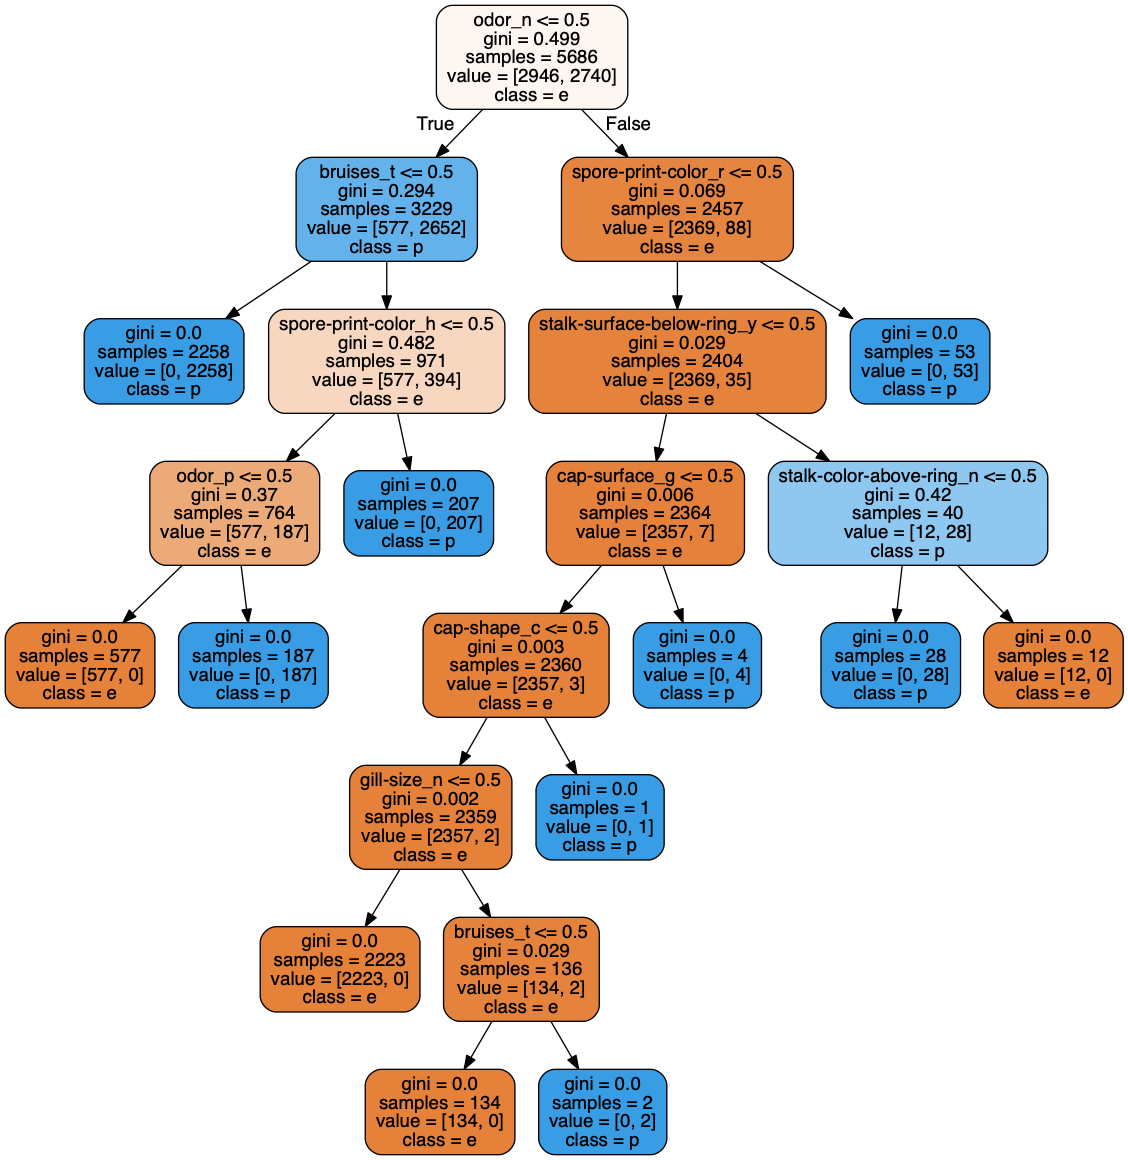

In [40]:
# Plots the tree we just learned
graph = tree_plot(tree, mushrooms_no_stalk_root)
Image(graph.create_png()) 

The leaves structure is as follows: `feature_class` $\leq$ 0.5 means mushroom does not have such class of such feature. Thus, the left branch leads to the part of the dataset with `feature` $\neq$ `class`, and the right branch leads to `feature` $=$ `class`. `gini` measures the gini impurity at the leaf. `samples` gives the total number of rows at the leaf, and `values` tell the number of samples with class [edible, poisonous], while `class` says the most frequent class and the color is indicative of the percentage presence of each class.

Here we can already draw some interesting conclusions, such as that a mushroom with some odor and that doesn't bruise is automatically posionous. However, let's remember that this is only true for the two genus our data comes from. Let's make sure of this fact 

In [41]:
# Subsets the dataset following the rules learned by the tree and gives the unique labels
mushrooms[mushrooms["odor"] != "n"][mushrooms["bruises"] != "t"]["class"].value_counts()

p    3252
Name: class, dtype: int64

Notice that we are getting more datapoints than 2258 because the plotted tree is the one learned on the training data. To get the whole tree and see that it will be the same, let's repeat the process but on the whole data.

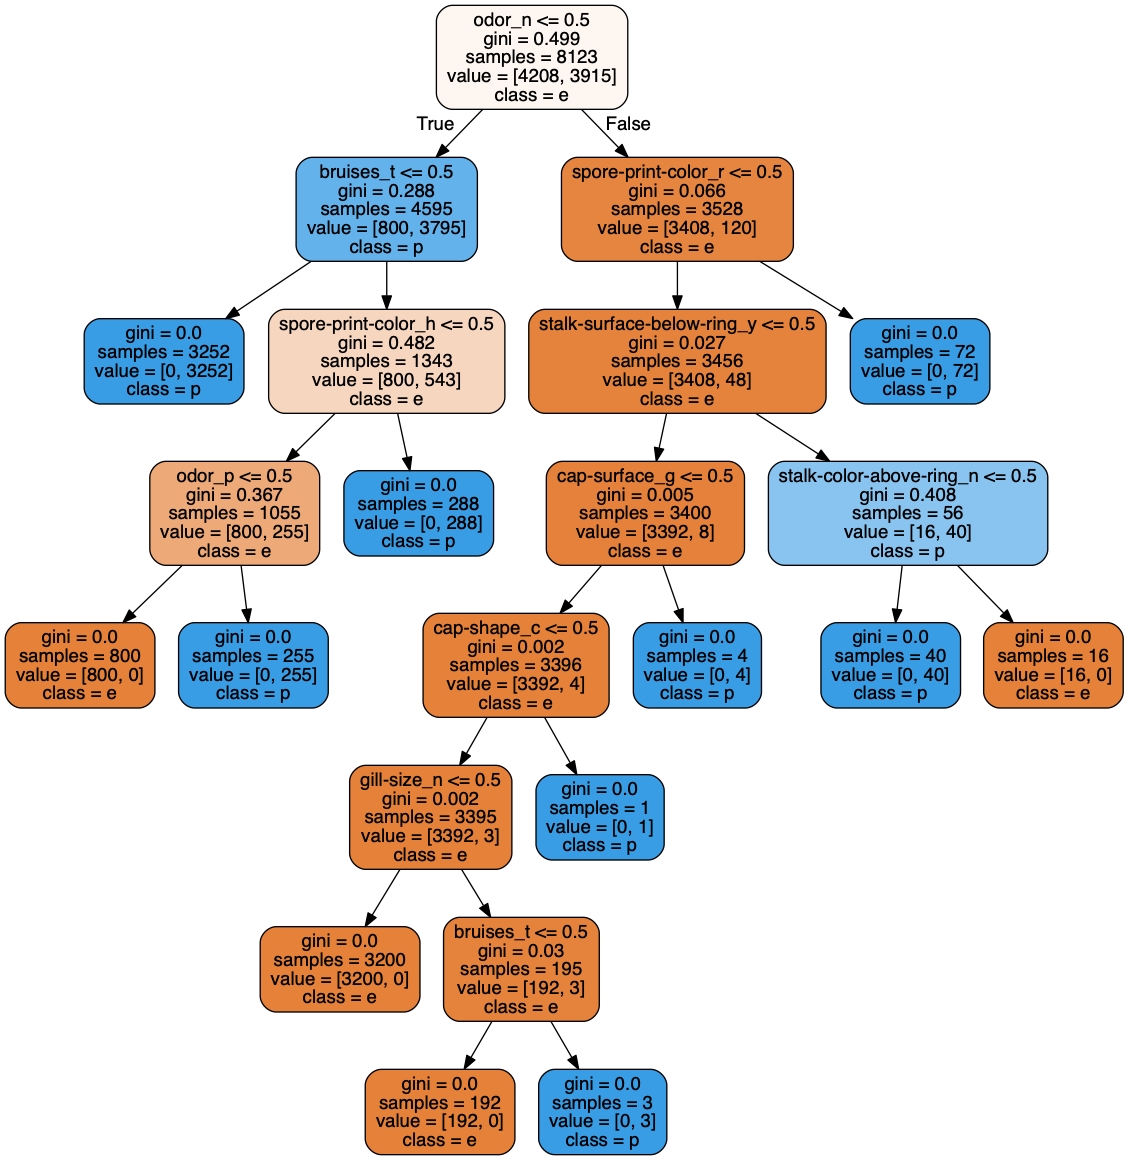

In [42]:
X = mushrooms_no_stalk_root.drop(["class"], axis=1)
X = pd.get_dummies(X).values
y = mushrooms_no_stalk_root["class"].values
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X, y)
graph = tree_plot(tree, mushrooms_no_stalk_root)
Image(graph.create_png()) 

While this tree could already be the one to hand out to potential mushroom hunters, let's keep going.

## 4.1.2 Raw dataset with missing values <a name="dt.2"></a>

In [43]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_raw_NaN)
tree = train_and_test(DecisionTreeClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


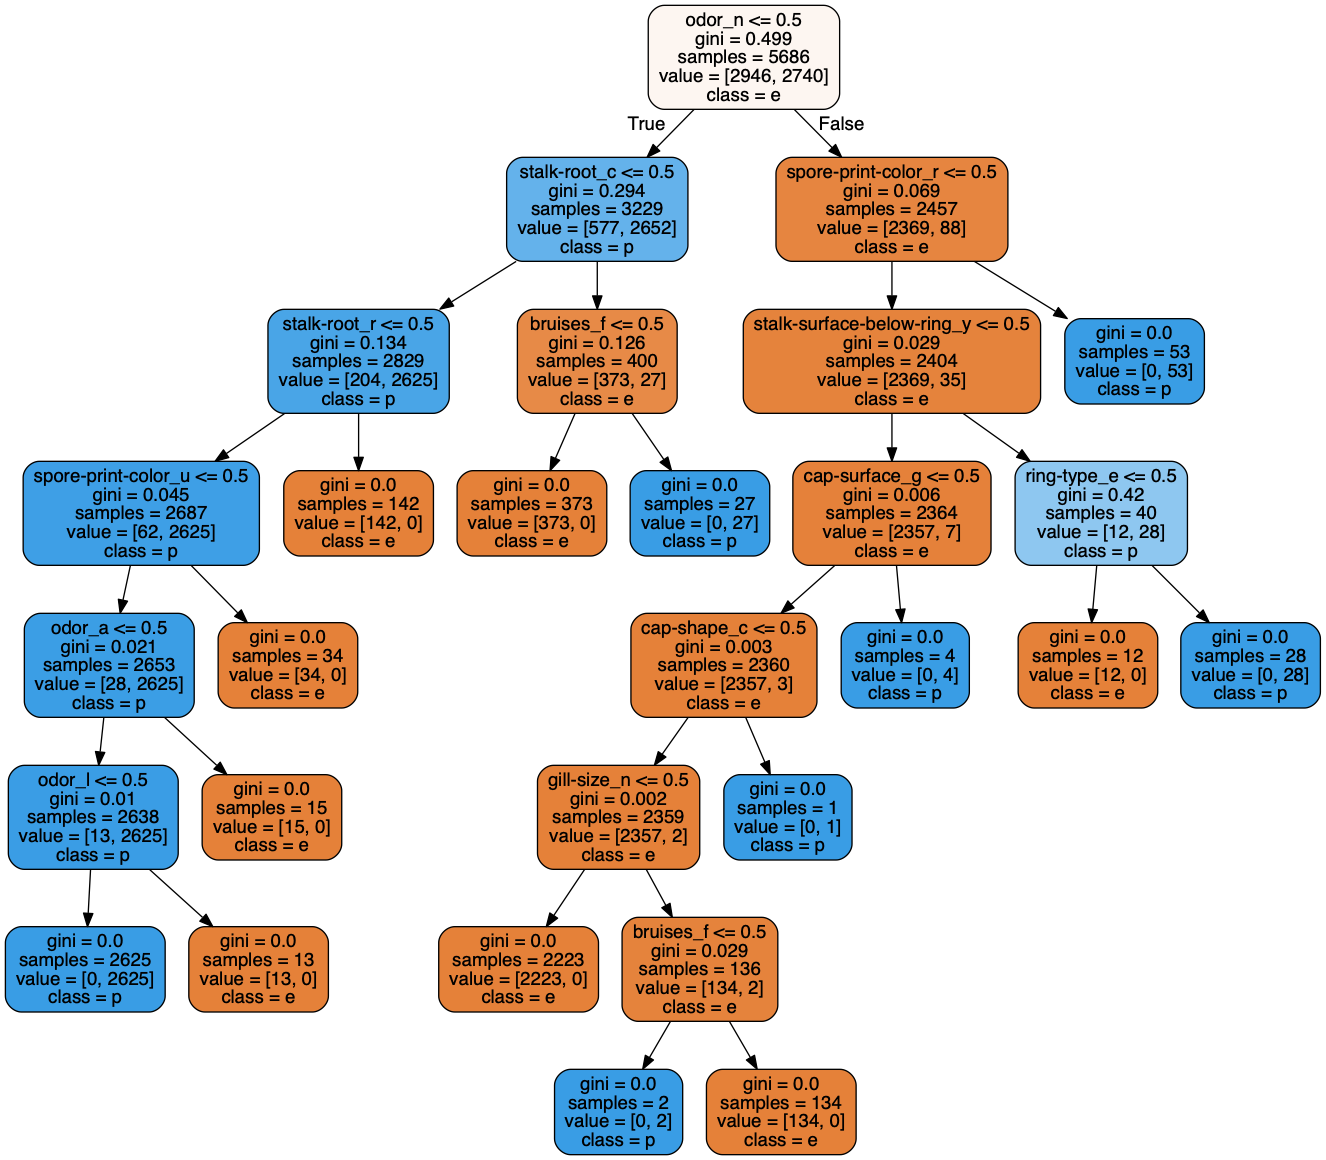

In [44]:
graph = tree_plot(tree, mushrooms_raw_NaN) 
Image(graph.create_png())

The tree changes but the score is the same. It seems that training with or without `stalk-root` gives the same accuracy, but actually `stalk-root` is almost at the top of the tree on some leaves, which is an indication that although `stalk-root` is a significant predictor, a combination of the some of the rest of the predictors can do the same job. We can also see that the tree is a little bit more complex in this last case.

## 4.1.3 Raw dataset treating "?" as another class <a name="dt.3"></a>

In [45]:
X_train, y_train, X_test, y_test = preprocess(mushrooms)
tree = train_and_test(DecisionTreeClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


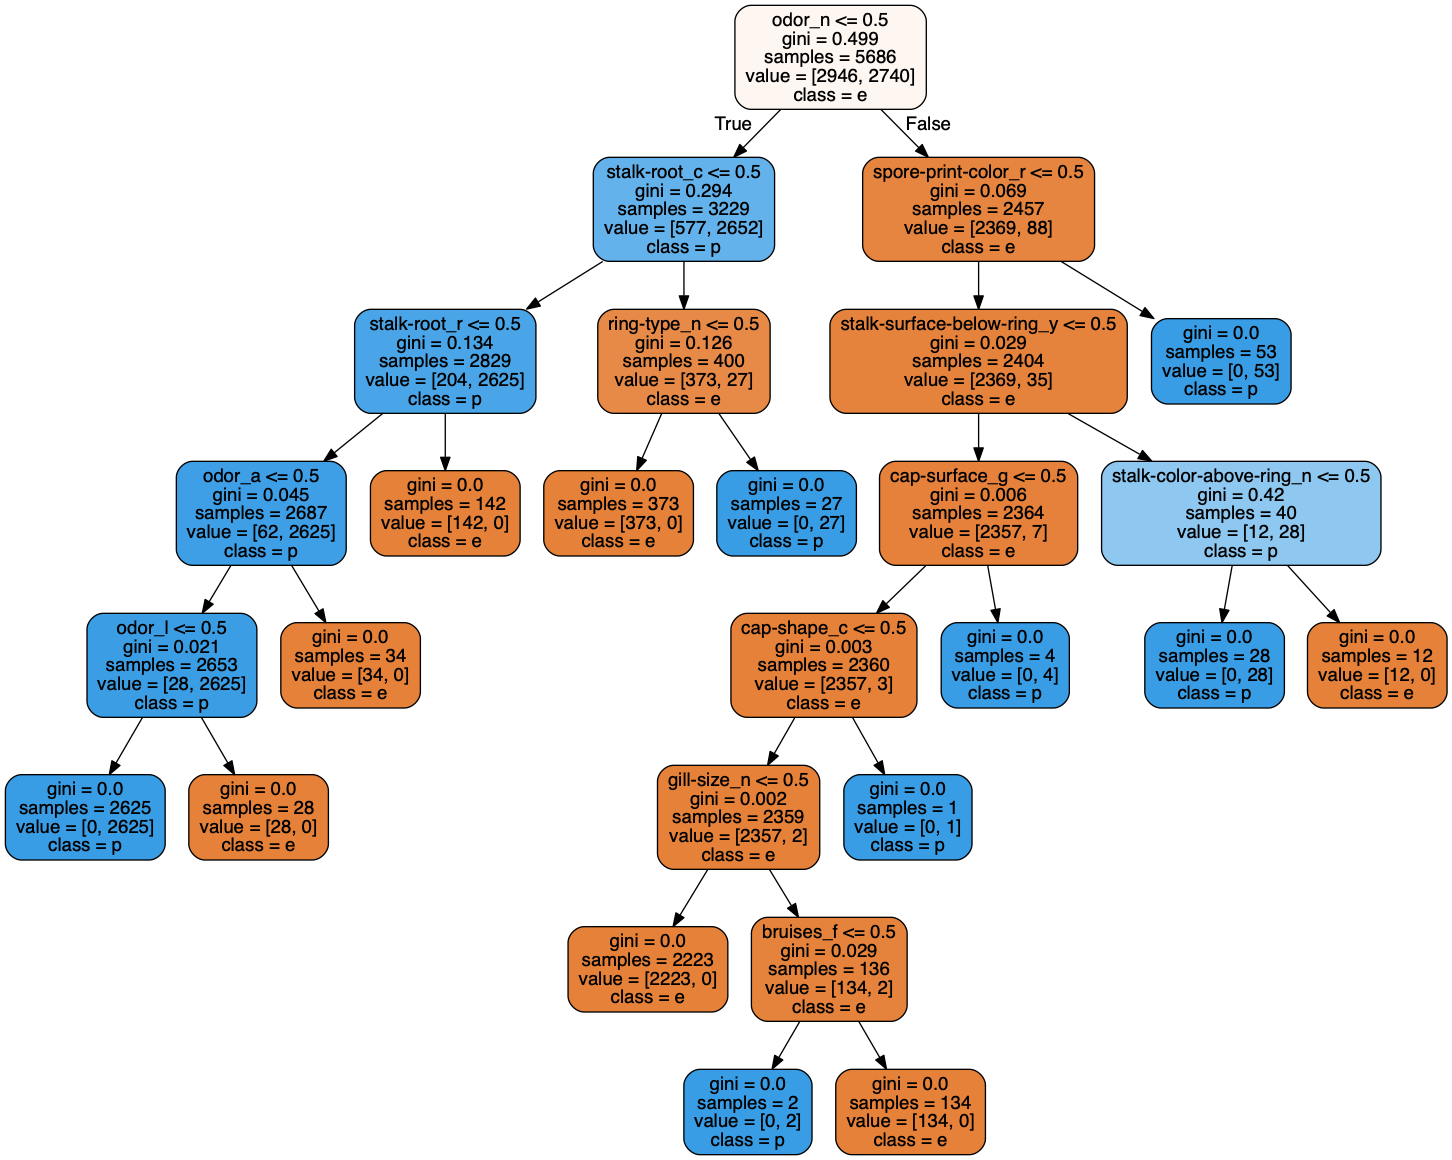

In [46]:
graph = tree_plot(tree, mushrooms) 
Image(graph.create_png())

Same score, the tree does change a little bit but not so much.

## 4.1.4 Dataset without rows with missing values <a name="dt.4"></a>

In [47]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_without_NaN)
tree = train_and_test(DecisionTreeClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


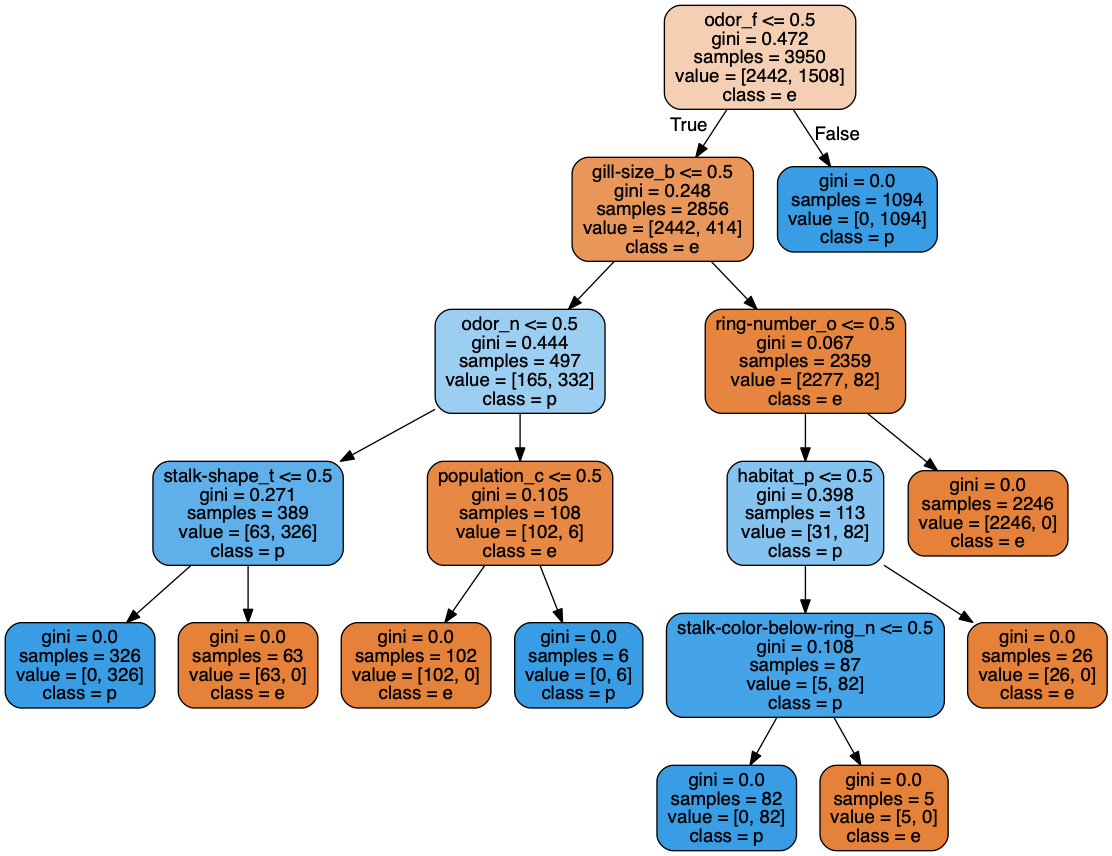

In [48]:
graph = tree_plot(tree, mushrooms_without_NaN) 
Image(graph.create_png())

Let's check some of the rules learned by this tree.

In [49]:
mushrooms[mushrooms["odor"] == "f"]["class"].value_counts()

p    2160
Name: class, dtype: int64

In [50]:
mushrooms[mushrooms["odor"] != "f"][mushrooms["gill-size"] == "b"][mushrooms["ring-number"] == "o"]["class"].value_counts()

e    3392
Name: class, dtype: int64

## 4.1.5 Imputing missing values <a name="dt.5"></a>

In [51]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_imputed)
tree = train_and_test(DecisionTreeClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


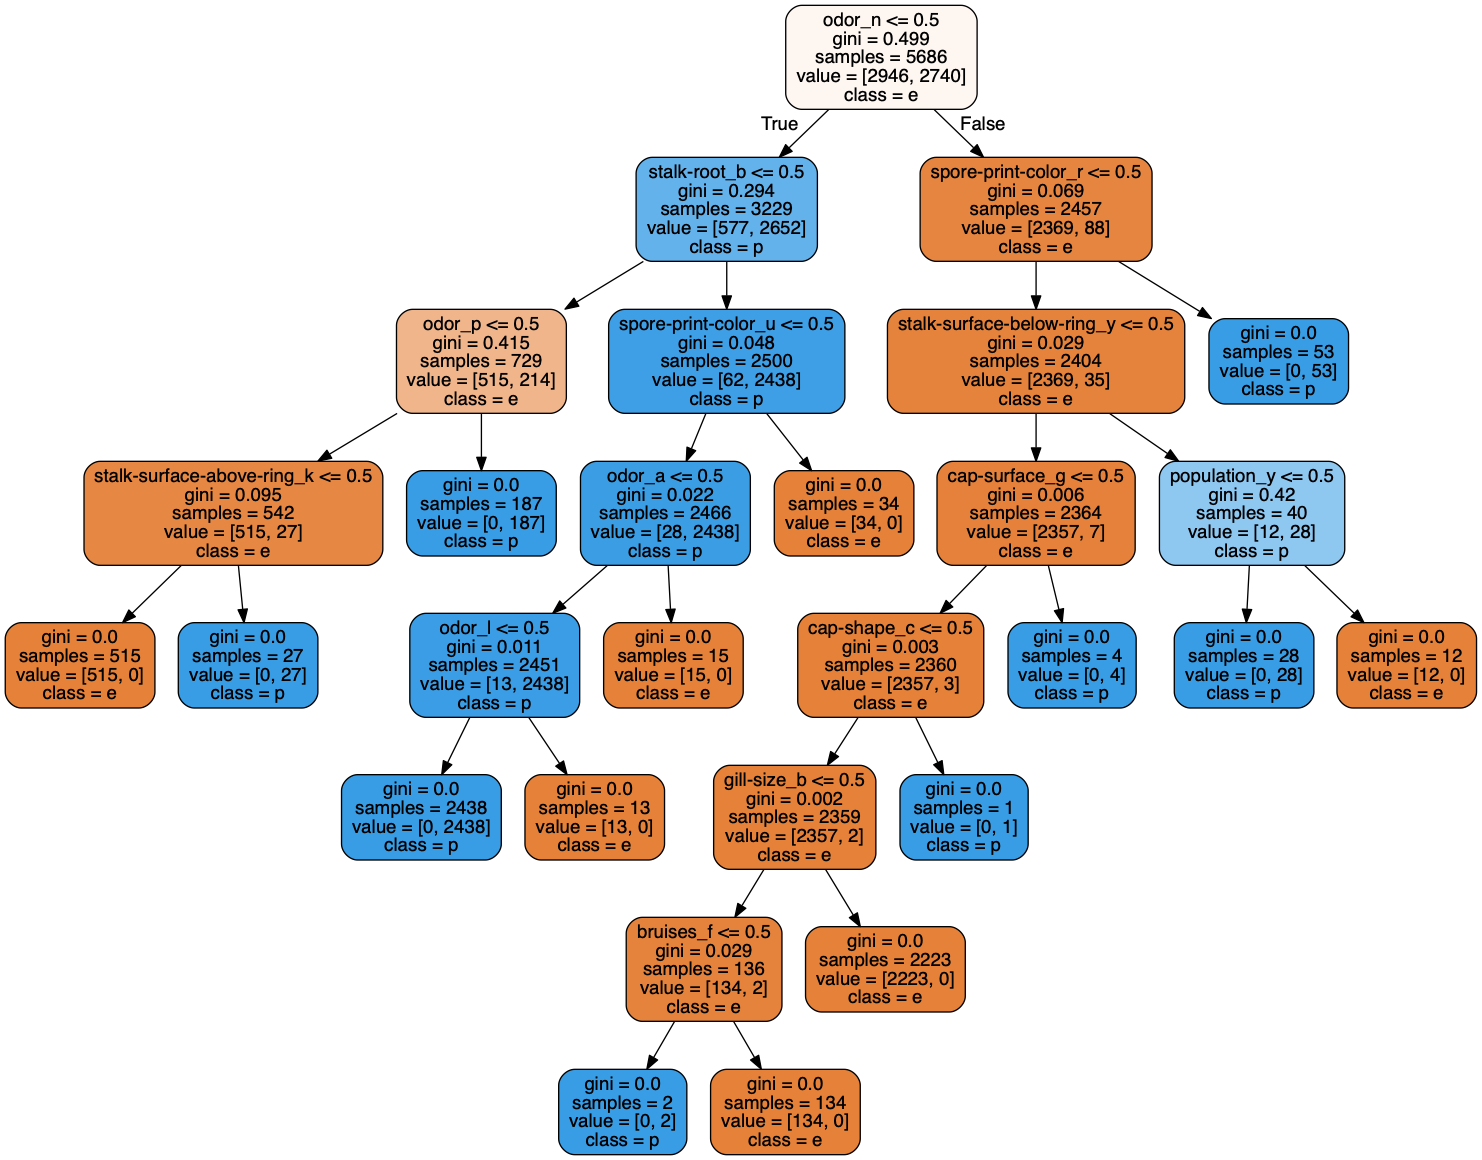

In [52]:
graph = tree_plot(tree, mushrooms_imputed)  
Image(graph.create_png())

By imputing the missing values and using all data with all features, we get the most complex tree, which makes sense.

# 4.2 Random Forest <a name="rf"></a>

In [53]:
from sklearn.ensemble import RandomForestClassifier

## 4.2.1 Dataset without stalk-root <a name="rf.1"></a>

In [54]:
# Preprocesses the dataset
X_train, y_train, X_test, y_test = preprocess(mushrooms_no_stalk_root)

In [55]:
# Trains and computes the accuracy of the sklearn default decision tree on the testing data
# and also gets the learned tree
forest = train_and_test(RandomForestClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


## 4.2.2 Raw dataset with missing values <a name="rf.2"></a>

In [56]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_raw_NaN)
forest = train_and_test(RandomForestClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


Now let's get the [features importances](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/). This case will be more reliable to get the importances of the original features because random forest actually gives back a numerical importance for each dummy feature, and the way it computes this importance is also better than Logistic Regression. 

# TODO: Explain how random forest gets features importances. 

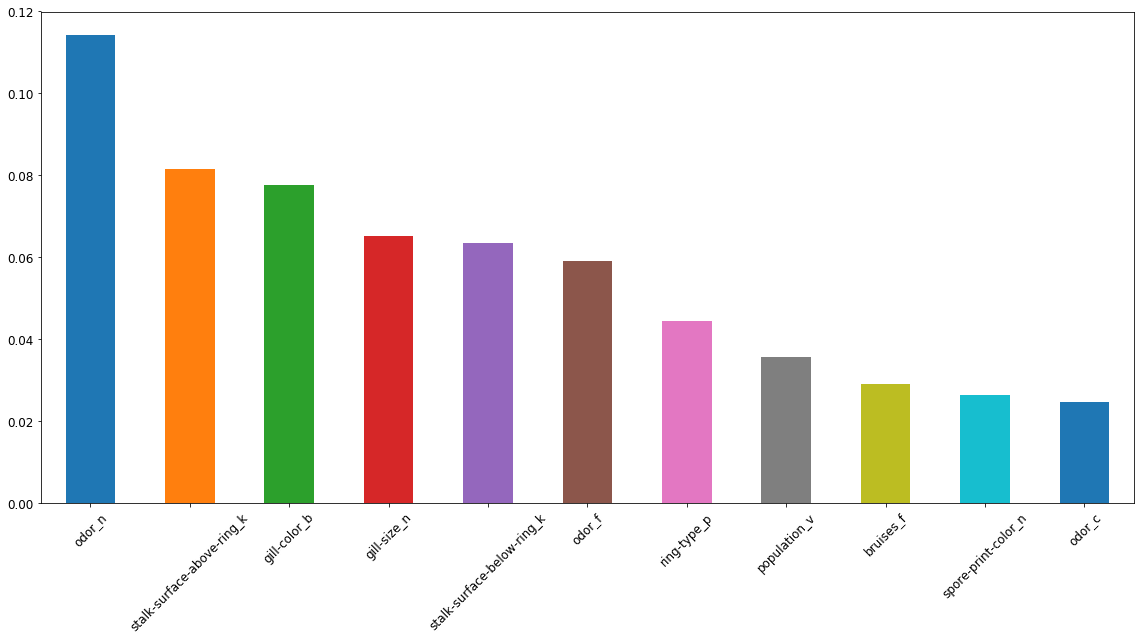

In [57]:
# Gets the importance of each dummy feature
importances = forest.feature_importances_
# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, pd.get_dummies(mushrooms_raw_NaN.drop(["class"], axis=1)).columns)
# Sort the array in descending order of the importances
f_importances = f_importances.sort_values(ascending=False)
# Get the top 10 most important features
f_importances_top_10 = f_importances.iloc[0:11]
# Draws the bar Plot for the 10 most important features 
f_importances_top_10.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=12)
# Show the plot
plt.tight_layout()
plt.show()

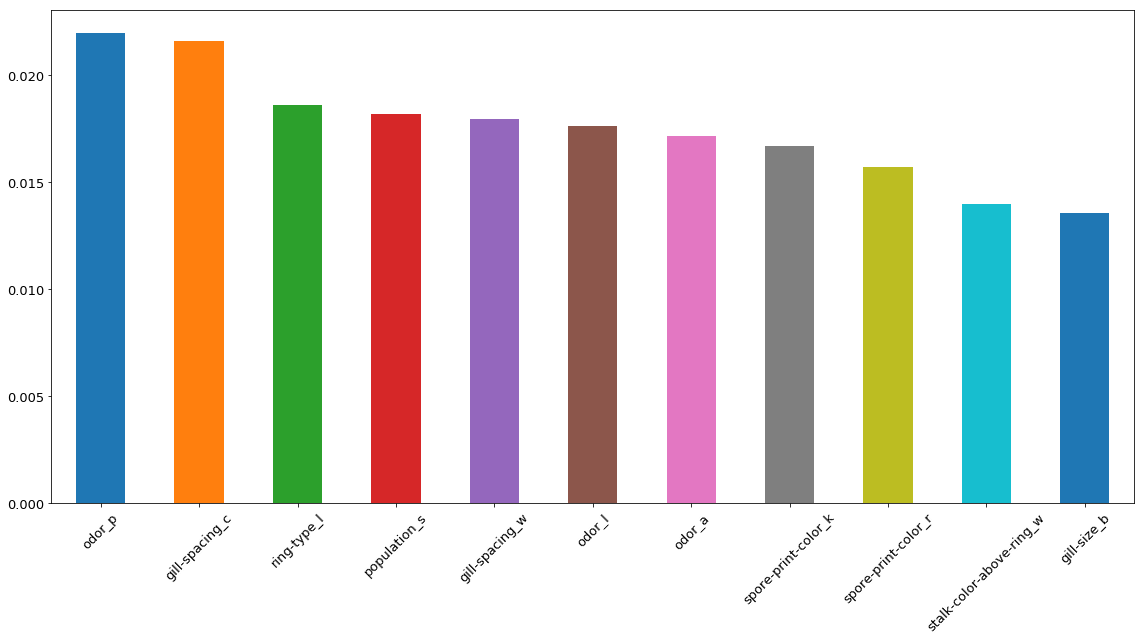

In [58]:
f_importances_top_20 = f_importances.iloc[11:22] 
f_importances_top_20.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=13)
plt.tight_layout()
plt.show()

Let's compute the original features importance by adding up the importances of each of its corresponding dummy variables.

In [59]:
# Names of the dummy variables
features = pd.get_dummies(mushrooms_raw_NaN.drop(["class"], axis=1)).columns
# Computes this again because we don't wont it sorted
f_importances = pd.Series(importances, features) 
importa_dict = {}
# For each feature in the original dataframe
for i in mushrooms_raw_NaN.drop("class", axis = 1).columns:
    # Assign this feature as key and the sum of the importances of every dummy variable corresponding to it as value
    importa_dict[i] = f_importances[features.str.contains(i)].sum() # Subsets f_importances with the columns containing the name 
    # "i", which is the original feature name, so it gets all the dummy columns "i_..."
feat_importances = pd.Series(importa_dict).sort_values(ascending=False)

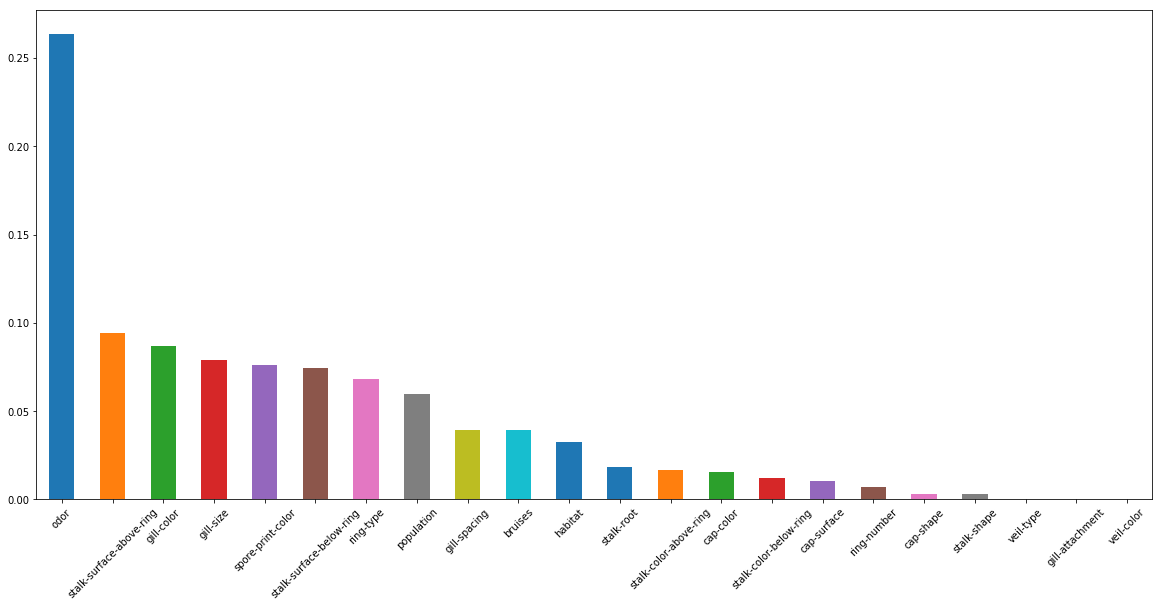

In [60]:
feat_importances.plot(kind='bar', figsize=(20,9), rot=45, fontsize=10)
plt.show()

As we already saw with the decision trees, `odor` seems to be the most relevant feature for prediction, with its importance being actually more than double the second most important feauture (`gill-color`). Comparing with our list of hard features to classify, we see that `odor` is the most relevant one, and that `stalk-surface-above-ring` is also the second most relevant feature, while `stalk-surface-below-ring` is the 6th most relevant, and `gill-spacing` is 9th. We can also see that `stalk-root` is not that relevant. We will learn models without the hard features later, but we can already imagine that our accuracy will be affected. 

For now, let's see how many features we really need to get a perfect score.

In [61]:
def rf_score(n_features):
    
    """"
    Returns the score of the random forest using the n_features most important features
    """
    
    # Slices the list of names of features sorted by importance from the most important until n_features
    X = mushrooms_raw_NaN[list(feat_importances.index)[0:n_features]]
    X = pd.get_dummies(X).values
    y = mushrooms_raw_NaN["class"].values
    le = LabelEncoder()
    y = le.fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)
    forest = RandomForestClassifier(random_state = 0)
    forest.fit(X_train, y_train)
    return forest.score(X_test, y_test)

In [62]:
for i in range(1, len(feat_importances.index)):
    if rf_score(i) == 1:
        print(i)
        break

7


So we only need 7 features out of the original 23 to get 100% percent accuracy! This should make it easier for people to identify the poisonous mushrooms! So if they have a computer or even a phone, they can run this Random Forest on a row of data where they fill the value of every feature and it would give them an answer in order to eat the mushrooms or not. 
However, we also wanted to just tell them a way to categorize the poisonous mushrooms without using any machine... this can easily be done with decision trees!

In [63]:
list(feat_importances.index)[0:7]

['odor',
 'stalk-surface-above-ring',
 'gill-color',
 'gill-size',
 'spore-print-color',
 'stalk-surface-below-ring',
 'ring-type']

In [64]:
subset = list(feat_importances.index)[0:7]
subset.append("class")
X_train, y_train, X_test, y_test = preprocess(mushrooms_raw_NaN[subset])
forest = train_and_test(RandomForestClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


## 4.1.3 Raw dataset treating "?" as another class <a name="rf.3"></a>

In [65]:
X_train, y_train, X_test, y_test = preprocess(mushrooms)
forest = train_and_test(RandomForestClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


## 4.1.4 Dataset without rows with missing values <a name="rf.4"></a>

In [66]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_without_NaN)
forest = train_and_test(RandomForestClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


Now let's get the [features importances](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/).

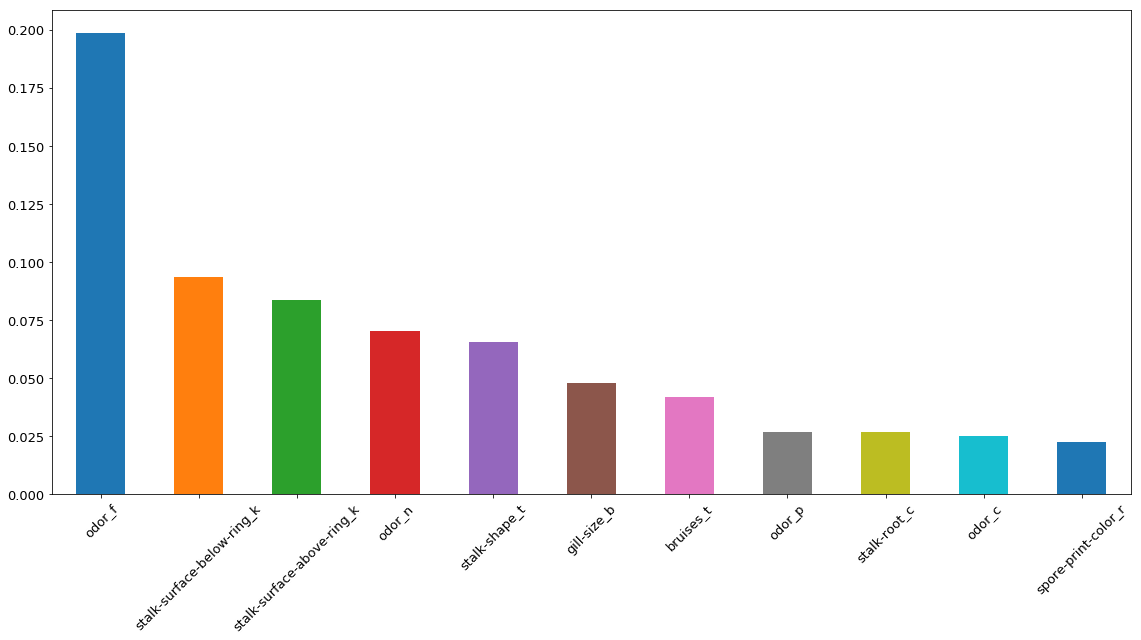

In [67]:
# Gets the importance of each features
importances = forest.feature_importances_
# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, pd.get_dummies(mushrooms_without_NaN.drop(["class"], axis=1)).columns)
# Sort the array in descending order of the importances
f_importances = f_importances.sort_values(ascending=False)
# Get the top 10 most important features
f_importances_top_10 = f_importances.iloc[0:11]
# Draws the bar Plot for the 10 most important features 
f_importances_top_10.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=13)
# Show the plot
plt.tight_layout()
plt.show()

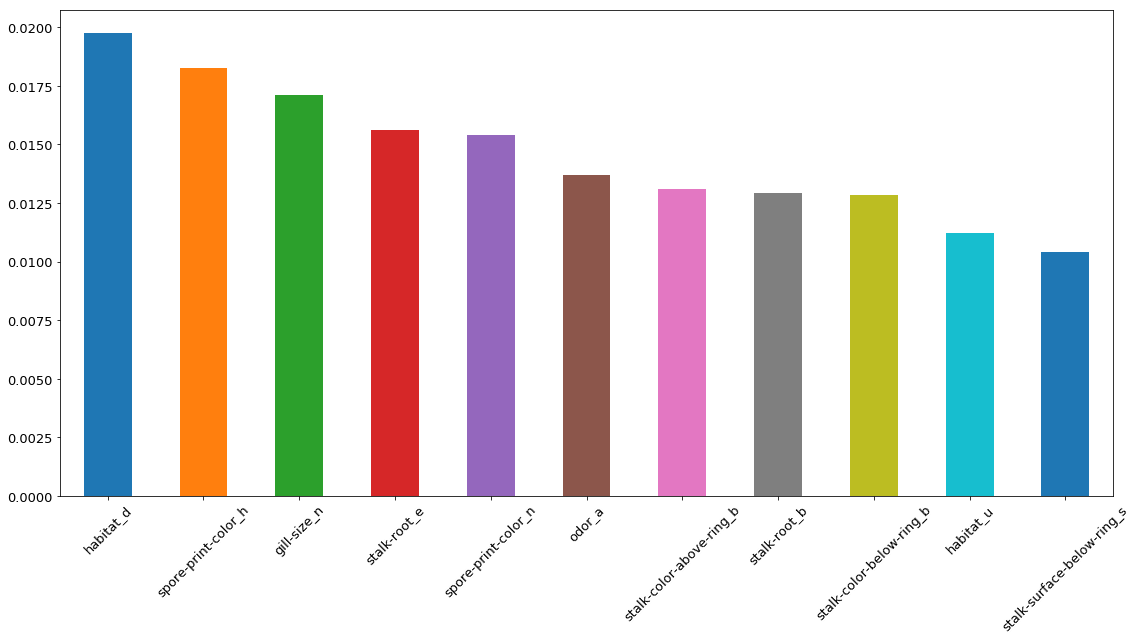

In [68]:
f_importances_top_20 = f_importances.iloc[11:22] 
f_importances_top_20.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=13)
plt.tight_layout()
plt.show()

Let's compute the original features importance by adding up the importances of each of its corresponding dummy variables.

In [69]:
# Names of the dummy variables
features = pd.get_dummies(mushrooms_without_NaN.drop(["class"], axis=1)).columns
# Computes this again because we don't wont it sorted
f_importances = pd.Series(importances, features) 
importa_dict = {}
# For each feature in the original dataframe
for i in mushrooms_without_NaN.drop("class", axis = 1).columns:
    # Assign this feature as key and the sum of the importances of every dummy variable corresponding to it as value
    importa_dict[i] = f_importances[features.str.contains(i)].sum() # Subsets f_importances with the columns containing the name 
    # "i", which is the original feature name, so it gets all the dummy columns "i_..."
feat_importances = pd.Series(importa_dict).sort_values(ascending=False)

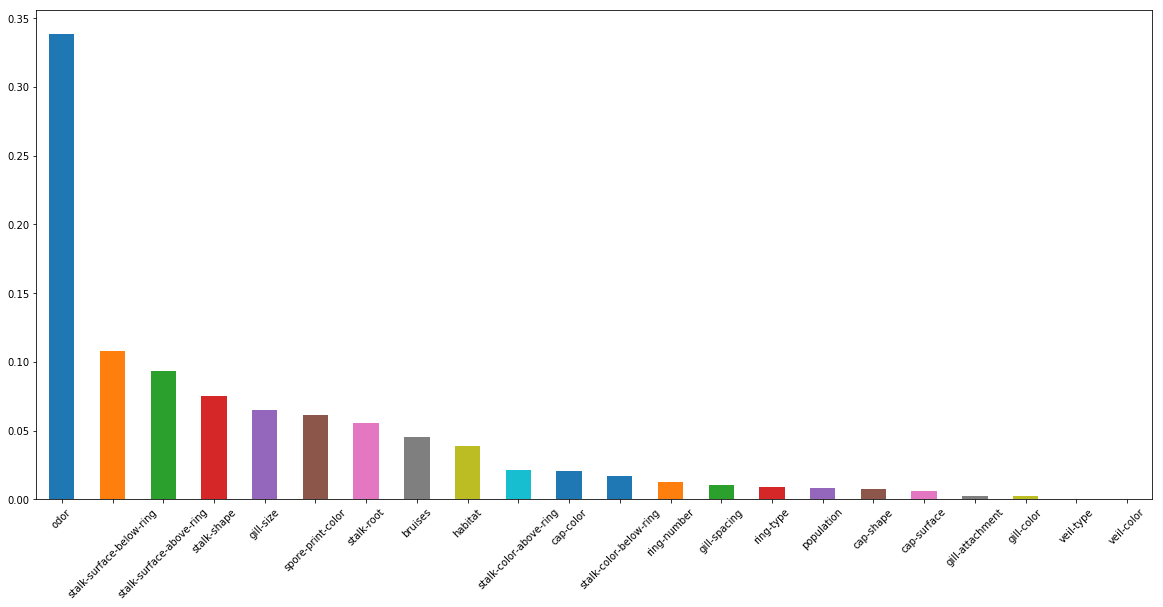

In [70]:
feat_importances.plot(kind='bar', figsize=(20,9), rot=45, fontsize=10)
plt.show()

Now we get a different feature importances plot.

# TODO: Explain this..

Let's see how many features we need to get a perfect score.

In [71]:
def rf_score(n_features):
    
    """"
    Returns the score of the random forest using the n_features most important features
    """
    
    # Slices the list of names of features sorted by importance from the most important until n_features
    X = mushrooms_without_NaN[list(feat_importances.index)[0:n_features]]
    X = pd.get_dummies(X).values
    y = mushrooms_without_NaN["class"].values
    le = LabelEncoder()
    y = le.fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)
    forest = RandomForestClassifier(random_state = 0)
    forest.fit(X_train, y_train)
    return forest.score(X_test, y_test)

In [72]:
for i in range(1, len(feat_importances.index)):
    if rf_score(i) == 1:
        print(i)
        break

8


In this case we need 8 features out of the original 23 to get 100% percent accuracy. 

In [73]:
list(feat_importances.index)[0:8]

['odor',
 'stalk-surface-below-ring',
 'stalk-surface-above-ring',
 'stalk-shape',
 'gill-size',
 'spore-print-color',
 'stalk-root',
 'bruises']

In [74]:
subset = list(feat_importances.index)[0:8]
subset.append("class")
X_train, y_train, X_test, y_test = preprocess(mushrooms_without_NaN[subset])
forest = train_and_test(RandomForestClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


# 5. Support Vector Machine <a name="svm"></a>

For the rest of the classifiers, let's use the dataset without `stalk-root`, as we have seen that it is not needed to get a perfect score.

In [75]:
from sklearn.svm import SVC

In [76]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_no_stalk_root)
svm = train_and_test(SVC(random_state = 0), [X_train, y_train], [X_test, y_test])

0.9983586376692655


Let's tune the hyperparameters.

In [77]:
pipe = Pipeline([('clf', SVC(random_state = 0))])

In [78]:
param_grid = [{'clf__C': [0.01, 0.1, 1, 10, 100],
               'clf__gamma': [0.01, 0.1, 1, 10, 100],
               'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}]

This grid search is very slow for such large datasets, but still acceptable. (We will expand on this on the section using only easy-to-tell features).

In [79]:
#import time
#start = time.time()
#gs = GridSearchCV(estimator=pipe,
                      #param_grid=param_grid,
                      #scoring='accuracy',
                      #cv=StratifiedKFold(n_splits=10,
                      #                   shuffle=True,
                      #                   random_state=0)) 
# Fit the pipeline
#gs = gs.fit(X_train, y_train)
    
# Update best_score_param_estimators
#print(gs.best_score_, gs.best_params_, gs.best_estimator_)
#print(time.time() - start) 

# Output:

# 1.0 {'clf__C': 0.01, 'clf__gamma': 1, 'clf__kernel': 'poly'} Pipeline(memory=None,
#     steps=[('clf', SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
#  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
#  max_iter=-1, probability=False, random_state=0, shrinking=True,
#  tol=0.001, verbose=False))])
# 3607.864349126816

In [80]:
svm = train_and_test(SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False),
                     [X_train, y_train], [X_test, y_test])

1.0


Using only the most important features learned by random forest.

In [81]:
X_train, y_train, X_test, y_test = preprocess(mushrooms[['odor', 'stalk-surface-above-ring', 'gill-color', 'gill-size',
 'spore-print-color', 'stalk-surface-below-ring', 'ring-type', "class"]])
svm = train_and_test(SVC(), [X_train, y_train], [X_test, y_test])

0.9979482970865818


In [82]:
#import time
#start = time.time()
#gs = GridSearchCV(estimator=pipe,
                      #param_grid=param_grid,
                      #scoring='accuracy',
                      #cv=StratifiedKFold(n_splits=10,
                      #                   shuffle=True,
                      #                   random_state=0)) 
# Fit the pipeline
#gs = gs.fit(X_train, y_train)
    
# Update best_score_param_estimators#
#print(gs.best_score_, gs.best_params_, gs.best_estimator_)
#print(time.time() - start) 

# Output:

# 1.0 {'clf__C': 0.01, 'clf__gamma': 1, 'clf__kernel': 'poly'} Pipeline(memory=None,
#     steps=[('clf', SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
#  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
#  max_iter=-1, probability=False, random_state=0, shrinking=True,
#  tol=0.001, verbose=False))])
# 896.680046081543

In [83]:
X_train, y_train, X_test, y_test = preprocess(mushrooms[['odor', 'stalk-surface-above-ring', 'gill-color', 'gill-size',
 'spore-print-color', 'stalk-surface-below-ring', 'ring-type', "class"]])
svm = train_and_test(SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False),
                     [X_train, y_train], [X_test, y_test])

1.0


# 6. K-Nearest Neighbors <a name="knn"></a>

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_no_stalk_root)
knn = train_and_test(KNeighborsClassifier(), [X_train, y_train], [X_test, y_test])

1.0


# 7. Naive Bayes <a name="NB"></a>

In [86]:
from sklearn.naive_bayes import GaussianNB

In [87]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_no_stalk_root)
svm = train_and_test(GaussianNB(), [X_train, y_train], [X_test, y_test])

0.9876897825194911


In [88]:
pipe = Pipeline([('clf', GaussianNB())])

param_grid = {'clf__priors': [None],
               'clf__var_smoothing': [1e-9]}

gs = GridSearchCV(estimator=pipe,
                      param_grid=param_grid,
                      scoring='accuracy',
                      cv=StratifiedKFold(n_splits=10,
                                         shuffle=True,
                                         random_state=0)) 
# Fit the pipeline
gs = gs.fit(X_train, y_train)
    
# Update best_score_param_estimators
print(gs.best_score_, gs.best_params_, gs.best_estimator_)

gs.best_estimator_.score(X_test, y_test)

0.9875131902919452 {'clf__priors': None, 'clf__var_smoothing': 1e-09} Pipeline(memory=None,
     steps=[('clf', GaussianNB(priors=None, var_smoothing=1e-09))])


0.9876897825194911

In [89]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_without_NaN)

pipe = Pipeline([('clf', GaussianNB())])

param_grid = {'clf__priors': [None],
               'clf__var_smoothing': [1e-9]}

gs = GridSearchCV(estimator=pipe,
                      param_grid=param_grid,
                      scoring='accuracy',
                      cv=StratifiedKFold(n_splits=10,
                                         shuffle=True,
                                         random_state=0)) 
# Fit the pipeline
gs = gs.fit(X_train, y_train)
    
# Update best_score_param_estimators
print(gs.best_score_, gs.best_params_, gs.best_estimator_)

gs.best_estimator_.score(X_test, y_test)

0.9982278481012659 {'clf__priors': None, 'clf__var_smoothing': 1e-09} Pipeline(memory=None,
     steps=[('clf', GaussianNB(priors=None, var_smoothing=1e-09))])


0.9988186650915535

As expected, it works better for less data and with all columns (we will also expand on this later).

In [90]:
X_trainn, X_testt, y_trainn, y_testt = train_test_split(X_train, y_train, test_size = 0.3, random_state = 0, stratify = y_train)

In [91]:
gs = GridSearchCV(estimator=pipe,
                      param_grid=param_grid,
                      scoring='accuracy',
                      cv=StratifiedKFold(n_splits=10,
                                         shuffle=True,
                                         random_state=0)) 
# Fit the pipeline
gs = gs.fit(X_trainn, y_trainn)
    
# Update best_score_param_estimators
print(gs.best_score_, gs.best_params_, gs.best_estimator_)

0.9971066907775769 {'clf__priors': None, 'clf__var_smoothing': 1e-09} Pipeline(memory=None,
     steps=[('clf', GaussianNB(priors=None, var_smoothing=1e-09))])


In [92]:
gs.best_estimator_.score(X_testt, y_testt)

1.0

# 8. Clustering <a name="cluster"></a>

We are also goint to implement clustering for supervised learning by removing all the labels from the training data minus two unique ones, fit the model on this data and use a map to get assign the clusters indexes to the original labels, and finally compare with the predicted testing labels by a combination of the clustering and this map.

In [93]:
from sklearn.cluster import KMeans

In [94]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_no_stalk_root) 
# Gets the indexes of the unique class labels
classes, indices = np.unique(y_train, return_index=True)
# Removes lables from y_train minus two unique ones
y_train = np.array([y_train[i] if i in indices else -1 for i in range(y_train.shape[0])])

In [95]:
km = KMeans(n_clusters=2, random_state=0)   
# Computes the clusters for the training data
y_train_pred = km.fit_predict(X_train)
# Gets the map of the clusters indexes to the original labels
dict_ = {}
#for i in range(y_train.shape[0]):
#    if y_train[i] != -1:
#        key = y_train_pred[i]
#        val = y_train[i]
#        dict_[key] = val
dict_[0] = 1
dict_[1] = 0
# Uses the clustering on the testing data
y_test_pred = km.predict(X_test)
# And the map to get back the original labels
y_test_pred = np.array([dict_[key] for key in y_test_pred])
# Computes the accuracy comparing with the real labels
from sklearn.metrics import precision_recall_fscore_support
print('Accuracy:', end=' ')
print(precision_recall_fscore_support(y_test_pred, y_test, average='micro')[0])

Accuracy: 0.9043906442347148


# TODO: Hyperparameter tune this

## Using only most significant features

In [96]:
# Gets the predictor features 
X = mushrooms[['odor','stalk-surface-above-ring','gill-color','gill-size',
                                  'spore-print-color','stalk-surface-below-ring','ring-type', "class"]]
X_train, y_train, X_test, y_test = preprocess(mushrooms_no_stalk_root)
# Gets the indexes of the unique class labels
classes, indices = np.unique(y_train, return_index=True)
# Removes lables from y_train minus two unique ones
y_train = np.array([y_train[i] if i in indices else -1 for i in range(y_train.shape[0])])

In [97]:
km = KMeans(n_clusters=2, random_state=2)   
y_train_pred = km.fit_predict(X_train)
print(y_train[:5])
print(y_train_pred[:5])
dict_ = {}
#for i in range(y_train.shape[0]):
#    if y_train[i] != -1:
#        key = y_train_pred[i]
#        val = y_train[i]
#        dict_[key] = val
dict_[0] = 1
dict_[1] = 0
y_test_pred = km.predict(X_test)
y_test_pred = np.array([dict_[key] for key in y_test_pred])
from sklearn.metrics import precision_recall_fscore_support
print('Accuracy:', end=' ')
print(precision_recall_fscore_support(y_test_pred, y_test, average='micro')[0])

[ 0 -1 -1  1 -1]
[0 1 1 0 1]
Accuracy: 0.9043906442347148


In [98]:
# 

# Using only the easy-to-tell features <a name="easyfeat"></a>


In the previous section we used all the features on the dataset to learn perfect models and get the importance of each feature. However, some of the features are not easy to classify for a novice mushroom hunter, and some times not even for experts. Thus, now we are going to use only the features we believe to be easy enough to classify, which are 

* Cap Shape
* Cap Color
* Bruises
* Gill Color
* Stalk Shape
* Stalk Root
* Stalk Color
* Veil Color
* Ring Number
* Ring Type
* Spore Print Color
* Population
* Habitat

We are also going to load all the modules again so that this section can be run without the need of running the previous section. 

In [99]:
# Gets the dataset with only the easy features
mushrooms_easy = mushrooms[['class', 'cap-shape', 'cap-color', 'bruises',
       'gill-color', 'stalk-shape', 'stalk-root', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']]

In [100]:
# Gets the dataset without the problematic feature
mushrooms_no_stalk_root = mushrooms_easy.drop("stalk-root", axis = 1)
# Gets the raw dataset with missing values as np.NaN
mushrooms_raw_NaN = mushrooms_easy.replace("?", np.NaN)
# Gets the dataset without the rows containing missing values
mushrooms_without_NaN = mushrooms_raw_NaN.dropna()

In [101]:
# Imputes the missing values on the dataset
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")
mushrooms_imputed = pd.DataFrame(imp.fit_transform(mushrooms_raw_NaN), columns = mushrooms_easy.columns)

# 3. Logistic Regression <a name="logreg2"></a>

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

In [103]:
def preprocess(data):
    """
    Preprocesses the input dataset and returns the training and testing data to pass on the clasiffiers
    data: dataset to be used to learn the model (DataFrame with predictor features and target)
    """
    # Gets the predictor features 
    X = data.drop(["class"], axis=1)
    # And encodes them (they are all categorical)
    X = pd.get_dummies(X).values
    # Gets the target feature (binary)
    y = data["class"].values

    le = LabelEncoder()
    # Encodes the target
    y = le.fit_transform(y)

    # Splits between training and testing, stratifying by the target variable
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)
    
    # No need to standardize as we only have 1s and 0s for all of our variables (they are all categorical).
    # This also makes it easier to interpret the decission tree in the next section 

    return X_train, y_train, X_test, y_test

def train_and_test(model, train_data, test_data):
    """
    Trains the model on the training data, prints the score for such model evaluating it on the testing data
    and also returns the learned model
    model: classifier to be used
    train_data: [X_train, y_train]
    test_data: [X_test, y_test]
    """
    # Fits the model to the training data 
    model.fit(train_data[0], train_data[1])
    # Evaluates the model using the testing data
    print(model.score(test_data[0], test_data[1]))
    # Returns the fitted model
    return model

## 3.1. Dataset without stalk-root <a name="logreg2.1"></a>

In [104]:
# Preprocesses the dataset
X_train, y_train, X_test, y_test = preprocess(mushrooms_no_stalk_root)

In [105]:
# Trains and computes the accuracy of the sklearn default logistic regression on the testing data
# and also gets the learned model
logreg = train_and_test(LogisticRegression(random_state = 0), [X_train, y_train], [X_test, y_test])

0.9872794419368075


Based on the feature importances we got from the [logistic regression model](#logreg1.6) on the last section, we had seen that only `odor` was a very relevant predictor, so this such high score was to be expected when only using the easy-to-tell features. Let's see if we can improve it by hyperparameter tuning.

In [106]:
C_range = [10 ** i for i in range(-4, 5)]

def hypertune(param_grid, scoring):
    """
    Tunes the hyperparameters, prints the cross-validation and test scores, 
    the time it took, and returns the best model
    param_grid: grid of parameters to pass to GridSearchCV
    scoring: score metric to be used
    """
    
    pipe = Pipeline([('clf', LogisticRegression(random_state = 0))])

    import time
    start = time.time()
    gs = GridSearchCV(estimator=pipe,
                          param_grid=param_grid,
                          scoring=scoring,
                          cv=StratifiedKFold(n_splits=10,
                                             shuffle=True,
                                             random_state=0)) 
    # Fit the pipeline
    gs = gs.fit(X_train, y_train)

    print(time.time() - start)
    # Update best_score_param_estimators
    print(gs.best_score_, gs.best_params_, gs.best_estimator_)
    print(gs.best_estimator_.score(X_test, y_test))
    return gs.best_estimator_

In [107]:
#param_grid = {'clf__multi_class': ['ovr'], 
#               'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#               'clf__C': C_range}
#best_logreg = hypertune(param_grid, "accuracy")

# Output:
#111.67471504211426
#0.9941962715441435 {'clf__C': 100, 'clf__multi_class': 'ovr', 'clf__solver': 'sag'} Pipeline(memory=None,
#     steps=[('clf', LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
#          intercept_scaling=1, max_iter=100, multi_class='ovr',
#          n_jobs=None, penalty='l2', random_state=0, solver='sag',
#          tol=0.0001, verbose=0, warm_start=False))])
#0.9938448912597456

We need to run this again with another parameter grid because `multi_class = multinomial` does not support `solver = liblinear`.

In [108]:
#param_grid = {'clf__multi_class': ['multinomial'], 
#               'clf__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
#               'clf__C': C_range}
#best_logreg = hypertune(param_grid, "accuracy")
# Output:
#174.70984292030334
#0.9941962715441435 {'clf__C': 100, 'clf__multi_class': 'multinomial', 'clf__solver': 'saga'} Pipeline(memory=None,
#     steps=[('clf', LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
#          intercept_scaling=1, max_iter=100, multi_class='multinomial',
#          n_jobs=None, penalty='l2', random_state=0, solver='saga',
#          tol=0.0001, verbose=0, warm_start=False))])
#0.9938448912597456

Let's get the confusion matrix to see the false positives (`edible = 0`, `poisonous = 1`), so in this case, a false positive means classifying an edible mushroom as poisonous, wich is much better than a false negative, i.e, classifying a poisonous mushroom as edible.

In [109]:
logreg = train_and_test(LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=0, solver='sag',
          tol=0.0001, verbose=0, warm_start=False), [X_train, y_train], [X_test, y_test])

0.9938448912597456


In [110]:
from sklearn.metrics import confusion_matrix
y_test_pred = logreg.predict(X_test) 
confusion_matrix(y_test, y_test_pred, labels=[0, 1])

array([[1250,   12],
       [   3, 1172]])

In [111]:
# https://stats.stackexchange.com/questions/95209/how-can-i-interpret-sklearn-confusion-matrix
pd.crosstab(y_test, y_test_pred, rownames=['True'], colnames=['Predicted'], margins=True) 

Predicted     0     1   All
True                       
0          1250    12  1262
1             3  1172  1175
All        1253  1184  2437

So we have 12 false positives and 3 false negatives, which is a very good result. However, let's see if we can drop the number of false negatives to zero. Because there is no score metric in *sklearn* to quantify the ability of the classifier to not to label as negative a sample that is positive, but there is one for the other way around ([precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)), we are going to change the encoding for the target, i.e, now `edible = 1` and `poisonous = 0`.

Thus, now we want to drop the number of false positives to zero, using the precision as scoring on the hyperparameter tuning.

In [112]:
mushrooms_no_stalk_root.head()

class cap-shape cap-color bruises gill-color stalk-shape  \
0     e         x         y       t          k           e   
1     e         b         w       t          n           e   
2     p         x         w       t          n           e   
3     e         x         g       f          k           t   
4     e         x         y       t          n           e   

  stalk-color-above-ring stalk-color-below-ring veil-color ring-number  \
0                      w                      w          w           o   
1                      w                      w          w           o   
2                      w                      w          w           o   
3                      w                      w          w           o   
4                      w                      w          w           o   

  ring-type spore-print-color population habitat  
0         p                 n          n       g  
1         p                 n          n       m  
2         p                 k          s       u  
3         e                 n          a       g  
4         p                 k          n       g

In [113]:
def preprocess_around(data):
    """
    Preprocesses the input dataset and returns the training and testing data to pass on the clasiffiers
    data: dataset to be used to learn the model (DataFrame with predictor features and target)
    """
    # Gets the predictor features 
    X = data.drop(["class"], axis=1)
    # And encodes them (they are all categorical)
    X = pd.get_dummies(X).values
    # Gets the target feature (binary)
    y = data["class"].values

    le = LabelEncoder()
    # Encodes the target
    y = le.fit_transform(y)
    # Turns the encoding around (0 for poisonous and 1 for edible)
    y_around = []
    for i in range(len(y)):
        if y[i] == 0:
            y_around.append(1)
        else:
            y_around.append(0)
    y_around = np.array(y_around)

    # Splits between training and testing, stratifying by the target variable
    X_train, X_test, y_train, y_test = train_test_split(X, y_around, test_size = 0.3, random_state = 0, stratify = y_around)
    
    # No need to standardize as we only have 1s and 0s for all of our variables (they are all categorical).
    # This also makes it easier to interpret the decission tree in the next section 

    return X_train, y_train, X_test, y_test

In [114]:
X_train, y_train, X_test, y_test = preprocess_around(mushrooms_no_stalk_root)
logreg = train_and_test(LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=0, solver='sag',
          tol=0.0001, verbose=0, warm_start=False), [X_train, y_train], [X_test, y_test])

0.9922035289290111


In [115]:
y_test_pred = logreg.predict(X_test) 
confusion_matrix(y_test, y_test_pred, labels=[0, 1])

array([[1171,    4],
       [  15, 1247]])

In [116]:
pd.crosstab(y_test, y_test_pred, rownames=['True'], colnames=['Predicted'], margins=True) 

Predicted     0     1   All
True                       
0          1171     4  1175
1            15  1247  1262
All        1186  1251  2437

In [117]:
#param_grid = {'clf__multi_class': ['ovr'], 
#               'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#               'clf__C': C_range}
#best_logreg = hypertune(param_grid, "precision")

# Output:
#108.85104608535767
#0.9986356138327595 {'clf__C': 10, 'clf__multi_class': 'ovr', 'clf__solver': 'newton-cg'} Pipeline(memory=None,
#     steps=[('clf', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
#          intercept_scaling=1, max_iter=100, multi_class='ovr',
#          n_jobs=None, penalty='l2', random_state=0, solver='newton-cg',
#          tol=0.0001, verbose=0, warm_start=False))])
#0.9922035289290111

In [118]:
X_train, y_train, X_test, y_test = preprocess_around(mushrooms_no_stalk_root)
logreg = train_and_test(LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=0, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False), [X_train, y_train], [X_test, y_test])

0.9922035289290111


In [119]:
y_test_pred = logreg.predict(X_test) 
confusion_matrix(y_test, y_test_pred, labels=[0, 1])

array([[1174,    1],
       [  18, 1244]])

In [120]:
pd.crosstab(y_test, y_test_pred, rownames=['True'], colnames=['Predicted'], margins=True) 

Predicted     0     1   All
True                       
0          1174     1  1175
1            18  1244  1262
All        1192  1245  2437

In [121]:
#param_grid = {'clf__multi_class': ['multinomial'], 
#               'clf__solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
#               'clf__C': C_range}
#best_logreg = hypertune(param_grid, "precision")

# Output:
# 204.0625228881836
#0.9986367755233194 {'clf__C': 10, 'clf__multi_class': 'multinomial', 'clf__solver': 'newton-cg'} Pipeline(memory=None,
#     steps=[('clf', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
#          intercept_scaling=1, max_iter=100, multi_class='multinomial',
#          n_jobs=None, penalty='l2', random_state=0, solver='newton-cg',
#          tol=0.0001, verbose=0, warm_start=False))])
#0.9926138695116947

In [122]:
X_train, y_train, X_test, y_test = preprocess_around(mushrooms_no_stalk_root)
logreg = train_and_test(LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=0, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False), [X_train, y_train], [X_test, y_test])

0.9926138695116947


In [123]:
y_test_pred = logreg.predict(X_test) 
confusion_matrix(y_test, y_test_pred, labels=[0, 1])

array([[1173,    2],
       [  16, 1246]])

In [124]:
pd.crosstab(y_test, y_test_pred, rownames=['True'], colnames=['Predicted'], margins=True) 

Predicted     0     1   All
True                       
0          1173     2  1175
1            16  1246  1262
All        1189  1248  2437

Well, we were able to drop the number of poisonous mushrooms identified as edible to only 1 out of 1174! This is a very good result, but we don't want anyone to die, so let's keep trying to drop this to zero!

## 3.2 Raw dataset with missing values <a name="logreg2.2"></a>

In [125]:
X_train, y_train, X_test, y_test = preprocess_around(mushrooms_raw_NaN)
logreg = train_and_test(LogisticRegression(random_state = 0), [X_train, y_train], [X_test, y_test])

0.9971276159212146


In [126]:
y_test_pred = logreg.predict(X_test) 
confusion_matrix(y_test, y_test_pred, labels=[0, 1])

array([[1173,    2],
       [   5, 1257]])

In [127]:
#param_grid = {'clf__multi_class': ['ovr'], 
#               'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#               'clf__C': C_range}
#best_logreg = hypertune(param_grid, "precision")

# Output:
#118.54426908493042
#1.0 {'clf__C': 10, 'clf__multi_class': 'ovr', 'clf__solver': 'newton-cg'} Pipeline(memory=None,
#     steps=[('clf', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
#          intercept_scaling=1, max_iter=100, multi_class='ovr',
#          n_jobs=None, penalty='l2', random_state=0, solver='newton-cg',
#          tol=0.0001, verbose=0, warm_start=False))])
#1.0

In [128]:
X_train, y_train, X_test, y_test = preprocess_around(mushrooms_raw_NaN)
logreg = train_and_test(LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=0, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False), [X_train, y_train], [X_test, y_test])

1.0


In [129]:
y_test_pred = logreg.predict(X_test) 
confusion_matrix(y_test, y_test_pred, labels=[0, 1])

array([[1175,    0],
       [   0, 1262]])

Using all the features does give a perfect score, even in the presence of the missing values!

## 3.3 Raw dataset treating "?" as another class <a name="logreg2.3"></a>

In [130]:
X_train, y_train, X_test, y_test = preprocess_around(mushrooms_easy)
logreg = train_and_test(LogisticRegression(random_state = 0), [X_train, y_train], [X_test, y_test])

0.9971276159212146


In [131]:
y_test_pred = logreg.predict(X_test) 
confusion_matrix(y_test, y_test_pred, labels=[0, 1])

array([[1173,    2],
       [   5, 1257]])

In [132]:
#param_grid = {'clf__multi_class': ['ovr'], 
#               'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#               'clf__C': C_range}
#best_logreg = hypertune(param_grid, "precision")

# Output:
#113.6818540096283
#1.0 {'clf__C': 10, 'clf__multi_class': 'ovr', 'clf__solver': 'newton-cg'} Pipeline(memory=None,
#     steps=[('clf', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
#          intercept_scaling=1, max_iter=100, multi_class='ovr',
#          n_jobs=None, penalty='l2', random_state=0, solver='newton-cg',
#          tol=0.0001, verbose=0, warm_start=False))])
#1.0

In [133]:
X_train, y_train, X_test, y_test = preprocess_around(mushrooms_raw_NaN)
logreg = train_and_test(LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=0, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False), [X_train, y_train], [X_test, y_test])

1.0


In [134]:
y_test_pred = logreg.predict(X_test) 
confusion_matrix(y_test, y_test_pred, labels=[0, 1])

array([[1175,    0],
       [   0, 1262]])

3.2 and 3.3 give the same score. It seems that logistic regression performs the same for missing values as np.nan and for missing values as a new dummy feature.

## 3.4 Dataset without rows with missing values <a name="logreg2.4"></a>

In [135]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_without_NaN)
logreg = train_and_test(LogisticRegression(random_state = 0), [X_train, y_train], [X_test, y_test]) 

1.0


This one works without hyperparameter tuning. 

## 3.5 Imputing missing values <a name="logreg2.5"></a>

In [136]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_imputed)
logreg = train_and_test(LogisticRegression(random_state = 0), [X_train, y_train], [X_test, y_test])

0.9979482970865818


In [137]:
y_test_pred = logreg.predict(X_test) 
confusion_matrix(y_test, y_test_pred, labels=[0, 1])

array([[1257,    5],
       [   0, 1175]])

In [138]:
#param_grid = {'clf__multi_class': ['ovr'], 
#               'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#               'clf__C': C_range}
#best_logreg = hypertune(param_grid, "precision")

# Output:
#115.20286178588867
#1.0 {'clf__C': 100, 'clf__multi_class': 'ovr', 'clf__solver': 'newton-cg'} Pipeline(memory=None,
#     steps=[('clf', LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
#          intercept_scaling=1, max_iter=100, multi_class='ovr',
#          n_jobs=None, penalty='l2', random_state=0, solver='newton-cg',
#          tol=0.0001, verbose=0, warm_start=False))])
#1.0

In [139]:
X_train, y_train, X_test, y_test = preprocess_around(mushrooms_raw_NaN)
logreg = train_and_test(LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=0, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False), [X_train, y_train], [X_test, y_test])

1.0


In [140]:
y_test_pred = logreg.predict(X_test) 
confusion_matrix(y_test, y_test_pred, labels=[0, 1])

array([[1175,    0],
       [   0, 1262]])

## 3.6 Features Importances <a name="logreg2.6"></a>

In [141]:
from sklearn.feature_selection import RFE
X_train, y_train, X_test, y_test = preprocess(mushrooms_without_NaN)

In [142]:
logreg = LogisticRegression()
selector = RFE(logreg, step=1)
selector.fit(X_train, y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=None, step=1, verbose=0)

In [143]:
# Gets the ranking of importance for each dummy variable
rankings = {}
cols = pd.get_dummies(mushrooms_without_NaN.drop("class", axis = 1)).columns
for i in range(len(selector.support_)):
    rankings[cols[i]] = selector.ranking_[i]

`rankings` is a dictionary containing the ranking of each dummy feature, but what we are interested in is the ranking of the original features. To this end, we are going to compute the mean of the rankings for every dummy feature of each original feature. This method, however, is clearly not the best. Furthermore, the own rankings are based on the weights of each feature, which is not really such a good meassure of importance. We will get better feature importances when we implement the random forest.

In [144]:
mushrooms_easy.columns[1:]

Index(['cap-shape', 'cap-color', 'bruises', 'gill-color', 'stalk-shape',
       'stalk-root', 'stalk-color-above-ring', 'stalk-color-below-ring',
       'veil-color', 'ring-number', 'ring-type', 'spore-print-color',
       'population', 'habitat'],
      dtype='object')

In [145]:
ranking_original = {}
# For each original feature (minus target)
for j in mushrooms_easy.columns[1:]:
    # Creates empty list
    ranks = []
    # For each dummy feature
    for i in rankings.keys():
        # If the name (string) of the original feature is in the name (string) of the dummy feature
        if j in i:
            # Appends the ranking of such dummy feature to the list
            ranks.append(rankings[i])
    # Computes the mean of the rankings of the dummy features corresponding to the original feature
    ranking_original[j] = np.mean(ranks) 

In [146]:
# Sorts the rankings in ascending order
sorted(ranking_original, key=ranking_original.get) # https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value

['stalk-shape',
 'stalk-root',
 'veil-color',
 'ring-type',
 'spore-print-color',
 'bruises',
 'stalk-color-below-ring',
 'habitat',
 'cap-color',
 'population',
 'ring-number',
 'stalk-color-above-ring',
 'cap-shape',
 'gill-color']

Now we can see how the most relevant easy features from before come out on top of the new feature importance ranking. ![m](https://i.imgur.com/jms4rQM.png) 

# 4. Decision Tree and Random Forest <a name="dtrf1"></a>

# 4.1 Decision Tree <a name="dt1"></a>

In [147]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image

def tree_plot(tree, data):
    """
    Returns the graph to plot the decision tree
    tree: decision tree to be plotted
    data: dataset used to learn the tree
    """
    dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=['p', # p comes firts because it is assigned a 0 by the LabelEncoder (when we use preprocess_around)
                                        'e'],
                           feature_names=pd.get_dummies(data.drop(["class"], axis=1)).columns,
                           out_file=None) 

    return graph_from_dot_data(dot_data) 

## 4.1.1 Dataset without stalk-root <a name="dt1.1"></a>

In [148]:
# Preprocesses the dataset
X_train, y_train, X_test, y_test = preprocess(mushrooms_no_stalk_root)

In [149]:
# Trains and computes the accuracy of the sklearn default decision tree on the testing data
# and also gets the learned tree
tree = train_and_test(DecisionTreeClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

0.993434550677062


In [150]:
X_train, y_train, X_test, y_test = preprocess_around(mushrooms_no_stalk_root)

In [151]:
def hypertune_tree(param_grid, scoring):
    """
    Tunes the hyperparameters, prints the cross-validation and test scores, 
    the time it took, and returns the best model
    param_grid: grid of parameters to pass to GridSearchCV
    scoring: score metric to be used
    """
    
    pipe = Pipeline([('clf', DecisionTreeClassifier(random_state = 0))])

    import time
    start = time.time()
    gs = GridSearchCV(estimator=pipe,
                          param_grid=param_grid,
                          scoring=scoring,
                          cv=StratifiedKFold(n_splits=10,
                                             shuffle=True,
                                             random_state=0)) 
    # Fit the pipeline
    gs = gs.fit(X_train, y_train)

    print(time.time() - start)
    # Update best_score_param_estimators
    print(gs.best_score_, gs.best_params_, gs.best_estimator_)
    print(gs.best_estimator_.score(X_test, y_test))
    return gs.best_estimator_

In [152]:
param_grid = {'clf__min_samples_split': [2, 10, 30],
               'clf__min_samples_leaf': [1, 10, 30]}

best_tree = hypertune_tree(param_grid, "precision")

2.211448907852173
0.9942453125944944 {'clf__min_samples_leaf': 1, 'clf__min_samples_split': 10} Pipeline(memory=None,
     steps=[('clf', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'))])
0.993434550677062


In [153]:
tree = train_and_test( DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'), [X_train, y_train], [X_test, y_test])

0.993434550677062


In [154]:
y_test_pred = tree.predict(X_test) 
confusion_matrix(y_test, y_test_pred, labels=[0, 1])

array([[1167,    8],
       [   8, 1254]])

In [155]:
pd.crosstab(y_test, y_test_pred, rownames=['True'], colnames=['Predicted'], margins=True) 

Predicted     0     1   All
True                       
0          1167     8  1175
1             8  1254  1262
All        1175  1262  2437

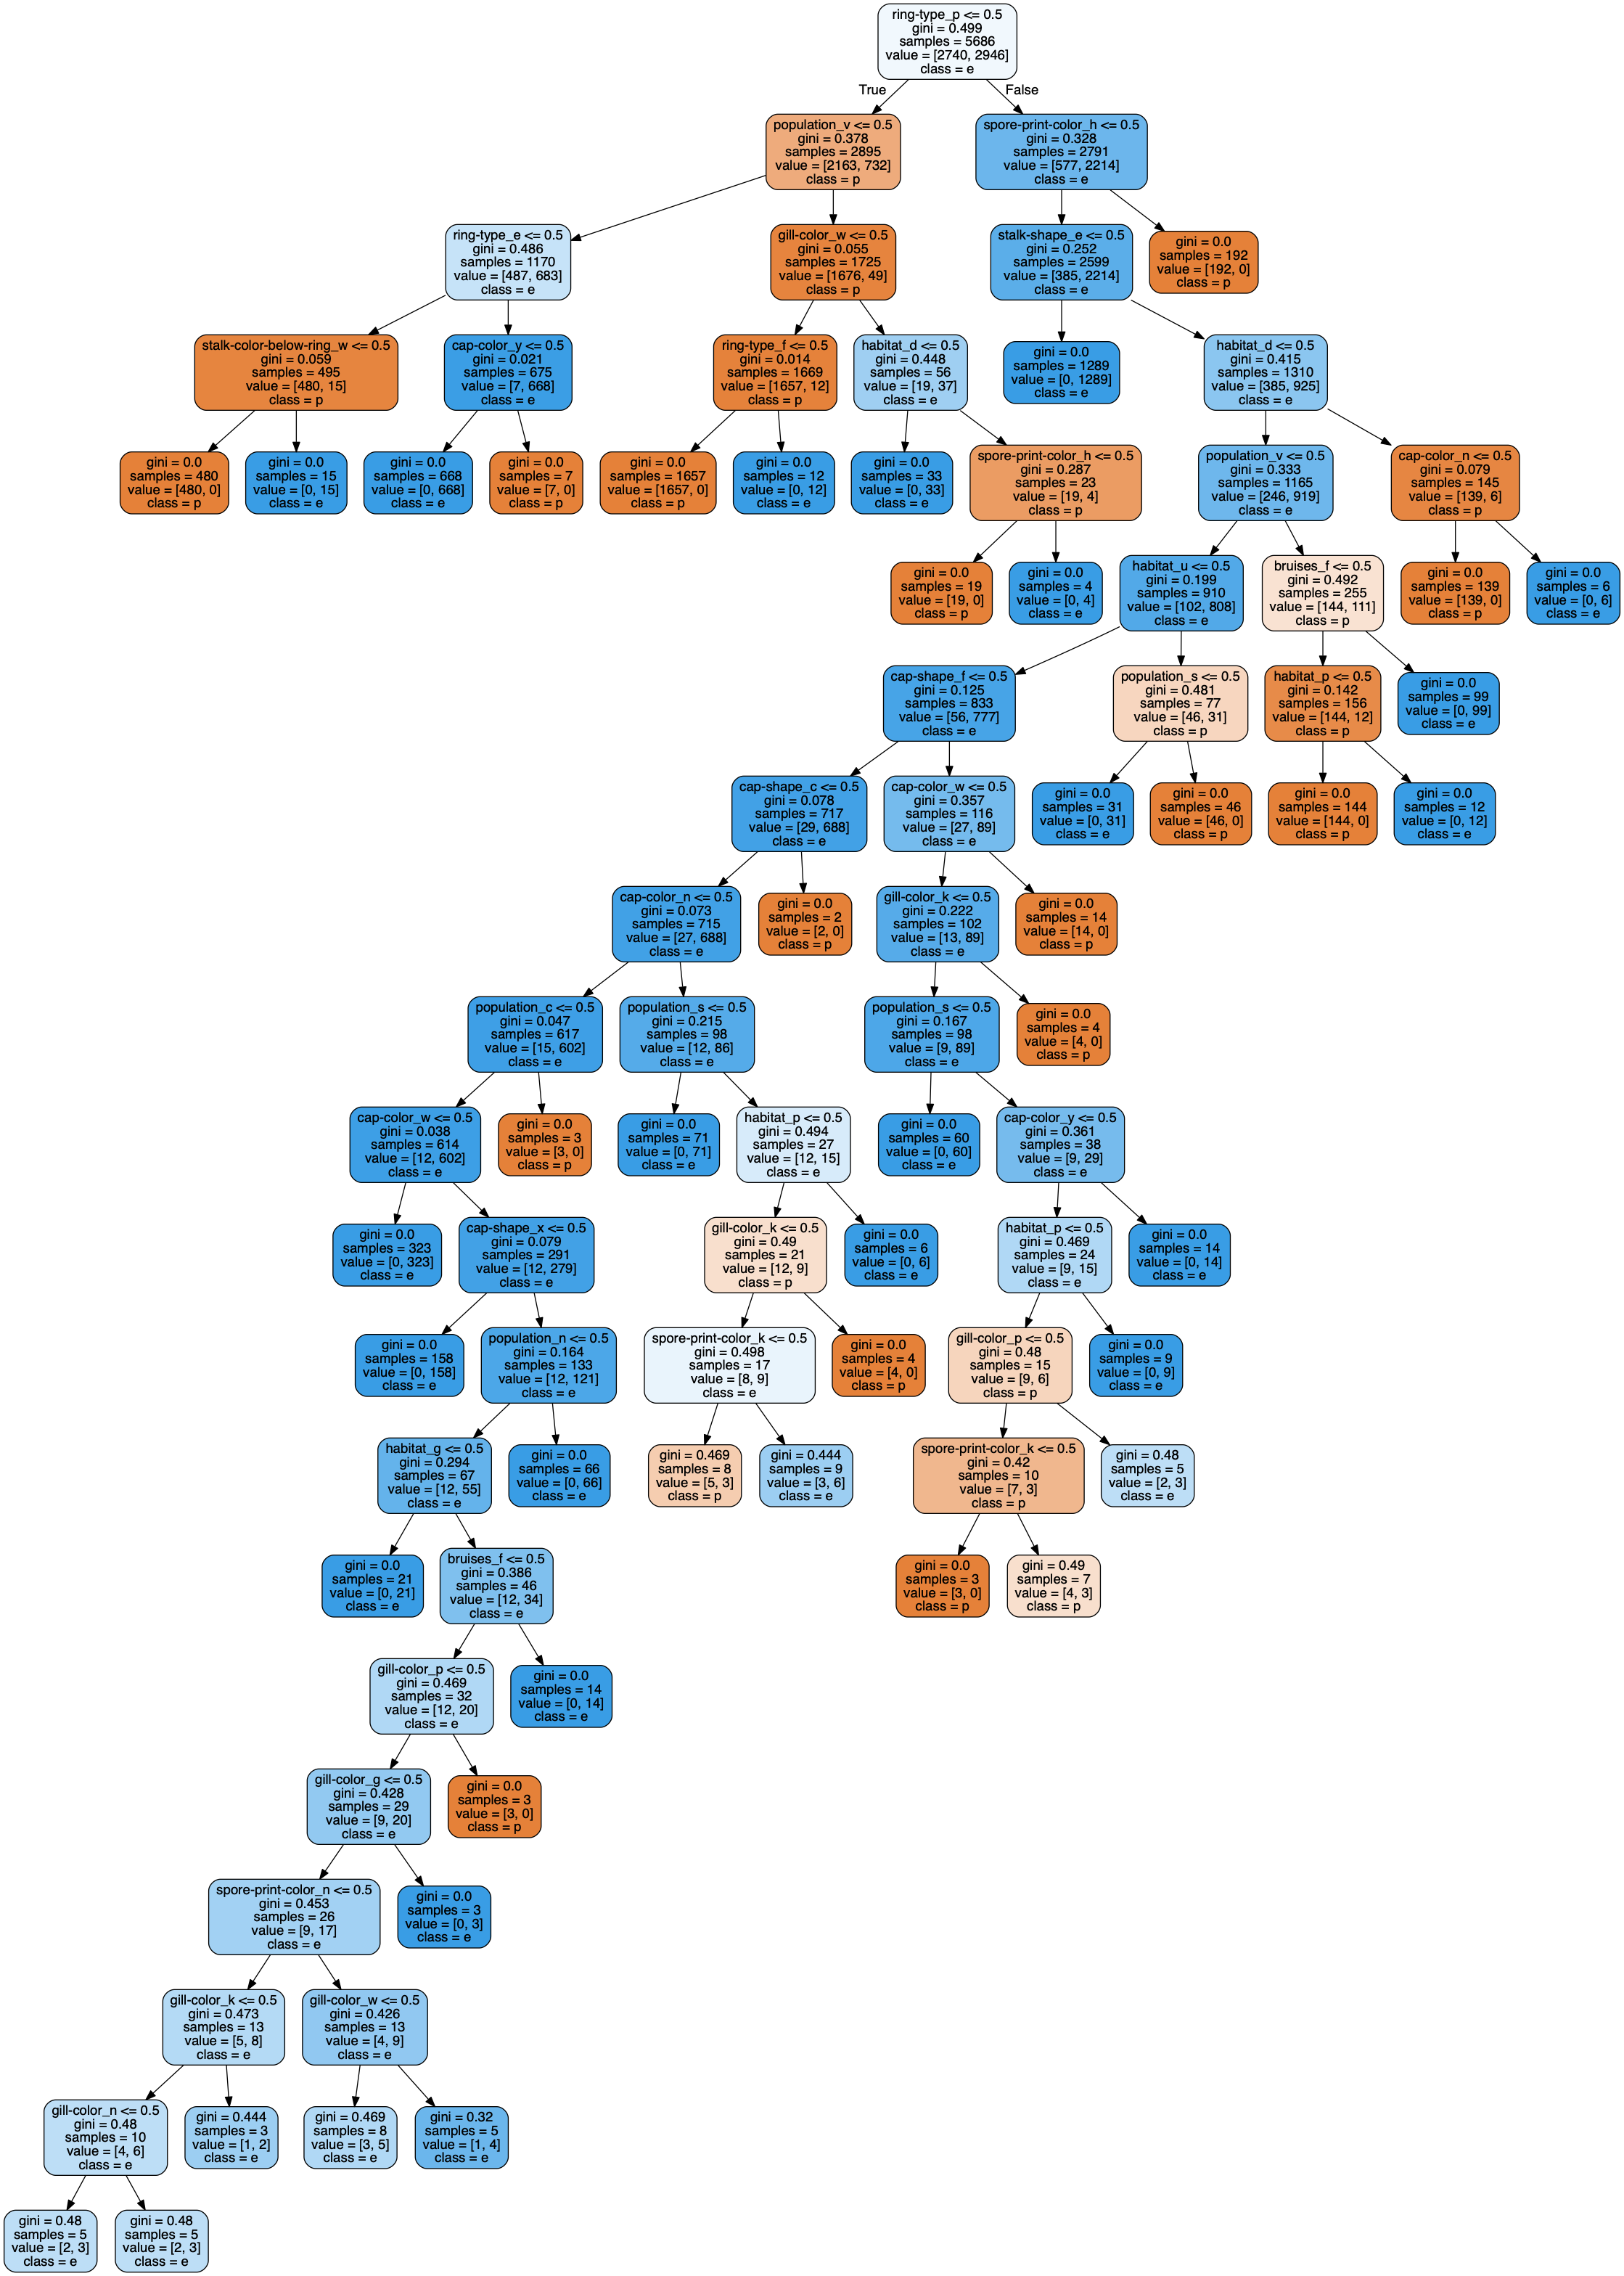

In [156]:
# Plots the tree we just learned
graph = tree_plot(tree, mushrooms_no_stalk_root)
Image(graph.create_png()) 

Wow, look at that tree... it's complexity is huge! This is because we are not using `stalk-root`, which when we only use the easy-to-tell features becomes one of the most relevants so we need to use a huge combination of rules using the rest of the features to get the best score, which still gives 8 false positives. 

## 4.1.2 Raw dataset with missing values <a name="dt1.2"></a>

In [157]:
# Preprocesses the dataset
X_train, y_train, X_test, y_test = preprocess_around(mushrooms_raw_NaN)

In [158]:
# Trains and computes the accuracy of the sklearn default decision tree on the testing data
# and also gets the learned tree
tree = train_and_test(DecisionTreeClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


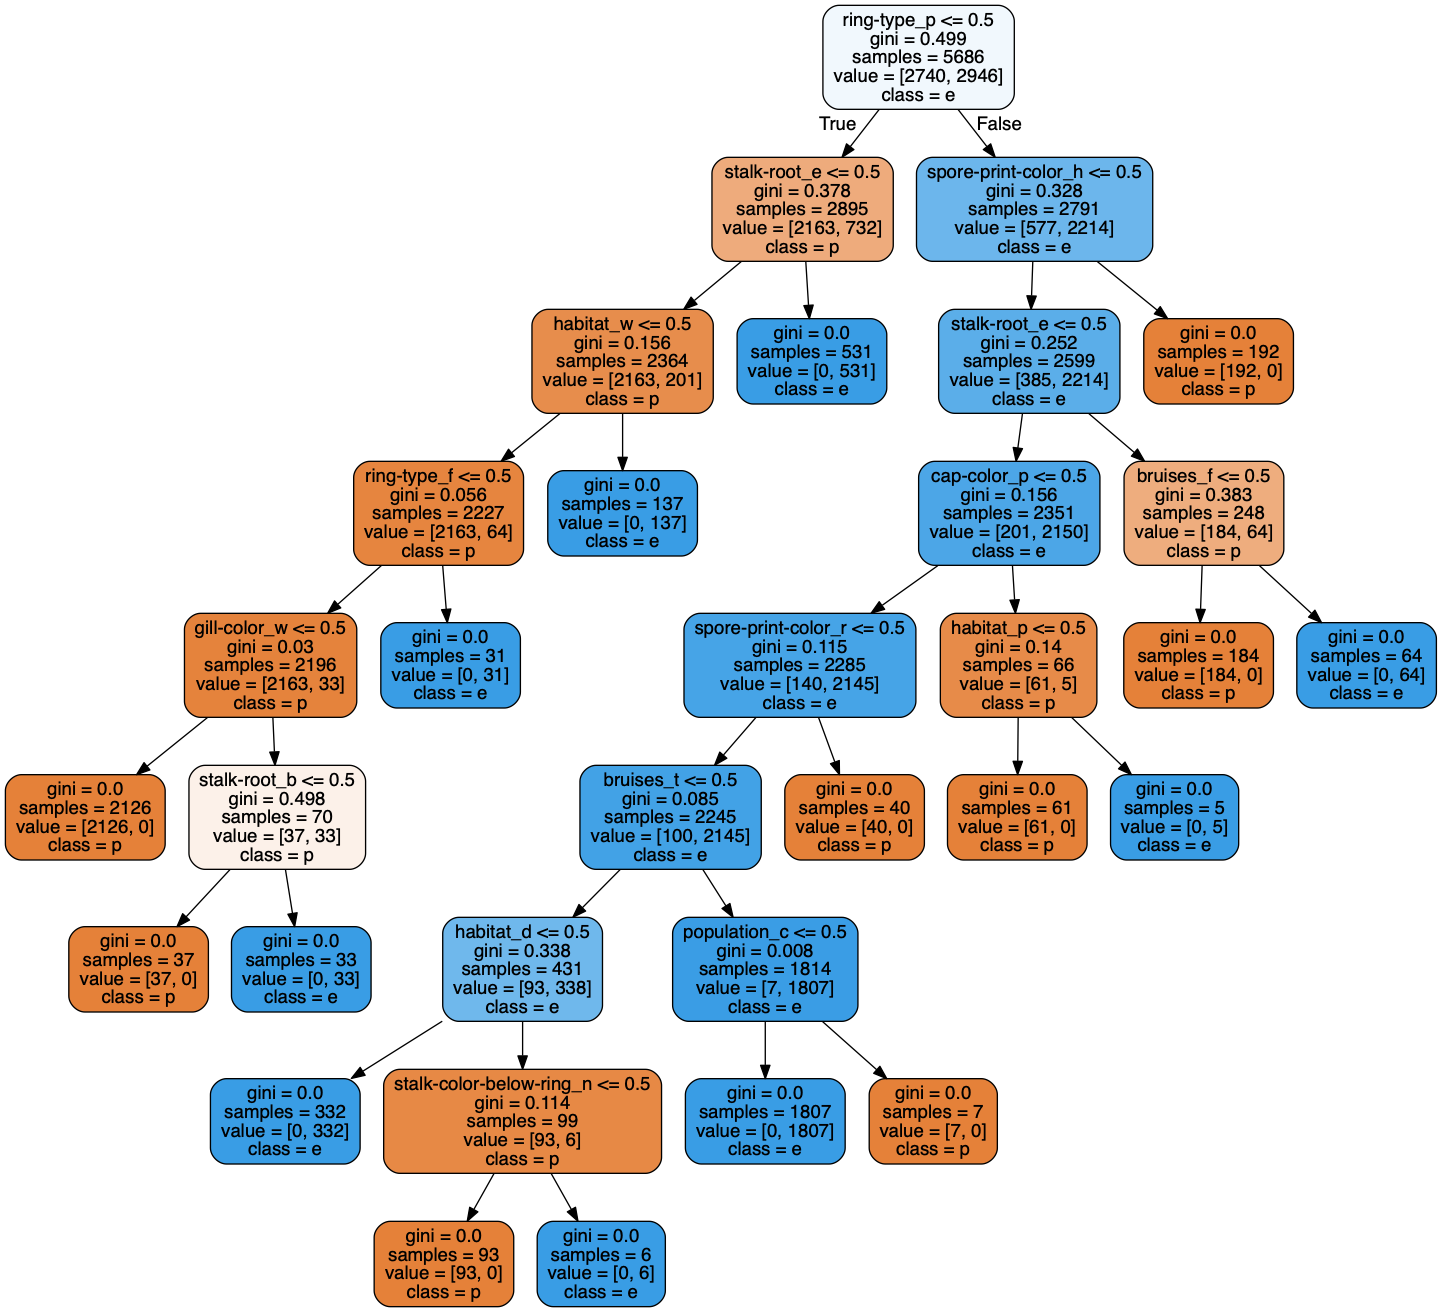

In [159]:
# Plots the tree we just learned
graph = tree_plot(tree, mushrooms_raw_NaN)
Image(graph.create_png()) 

As we expected, the complexity is lower but still higher than when using all the features, including the hard ones to classify. However, we are able to get a perfect tree in this case.

## 4.1.3 Raw dataset treating "?" as another class <a name="dt1.3"></a>

In [160]:
# Preprocesses the dataset
X_train, y_train, X_test, y_test = preprocess_around(mushrooms_easy)

In [161]:
# Trains and computes the accuracy of the sklearn default decision tree on the testing data
# and also gets the learned tree
tree = train_and_test(DecisionTreeClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


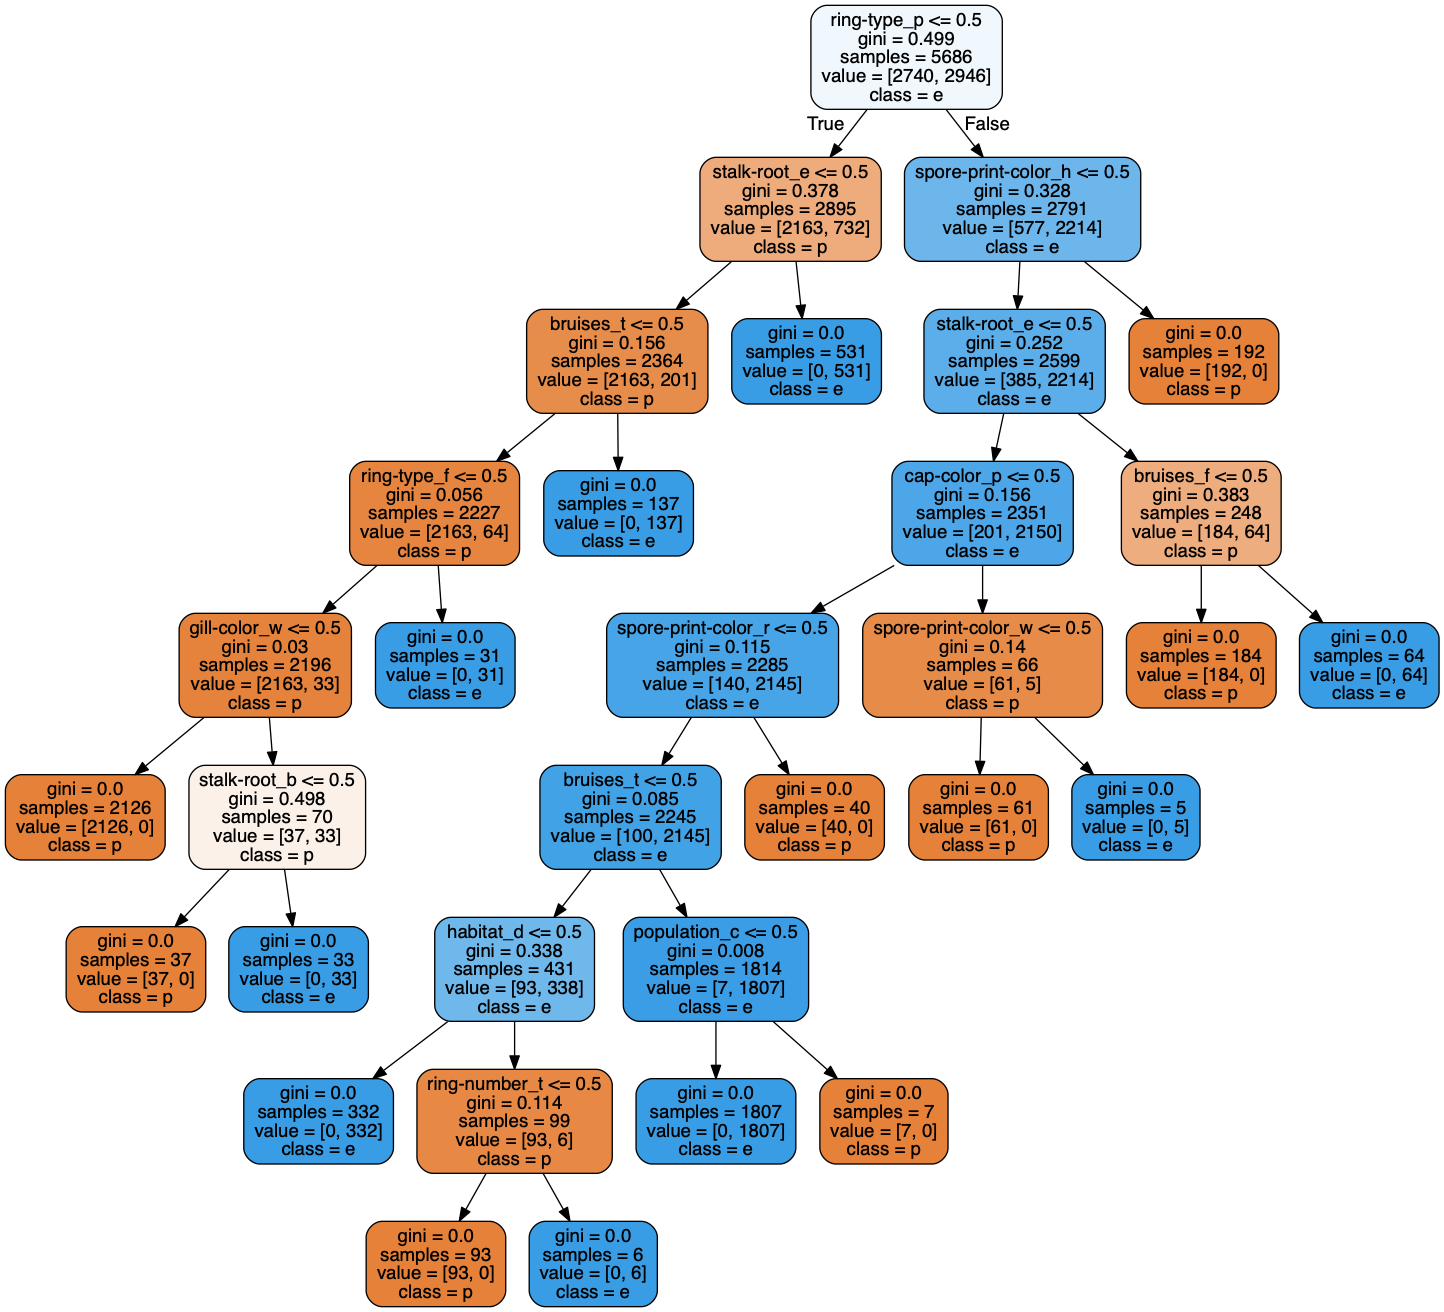

In [162]:
# Plots the tree we just learned
graph = tree_plot(tree, mushrooms_easy)
Image(graph.create_png()) 

Same score, the tree does change a little bit but not so much.

## 4.1.4 Dataset without rows with missing values <a name="dt1.4"></a>

In [163]:
X_train, y_train, X_test, y_test = preprocess_around(mushrooms_without_NaN)
tree = train_and_test(DecisionTreeClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


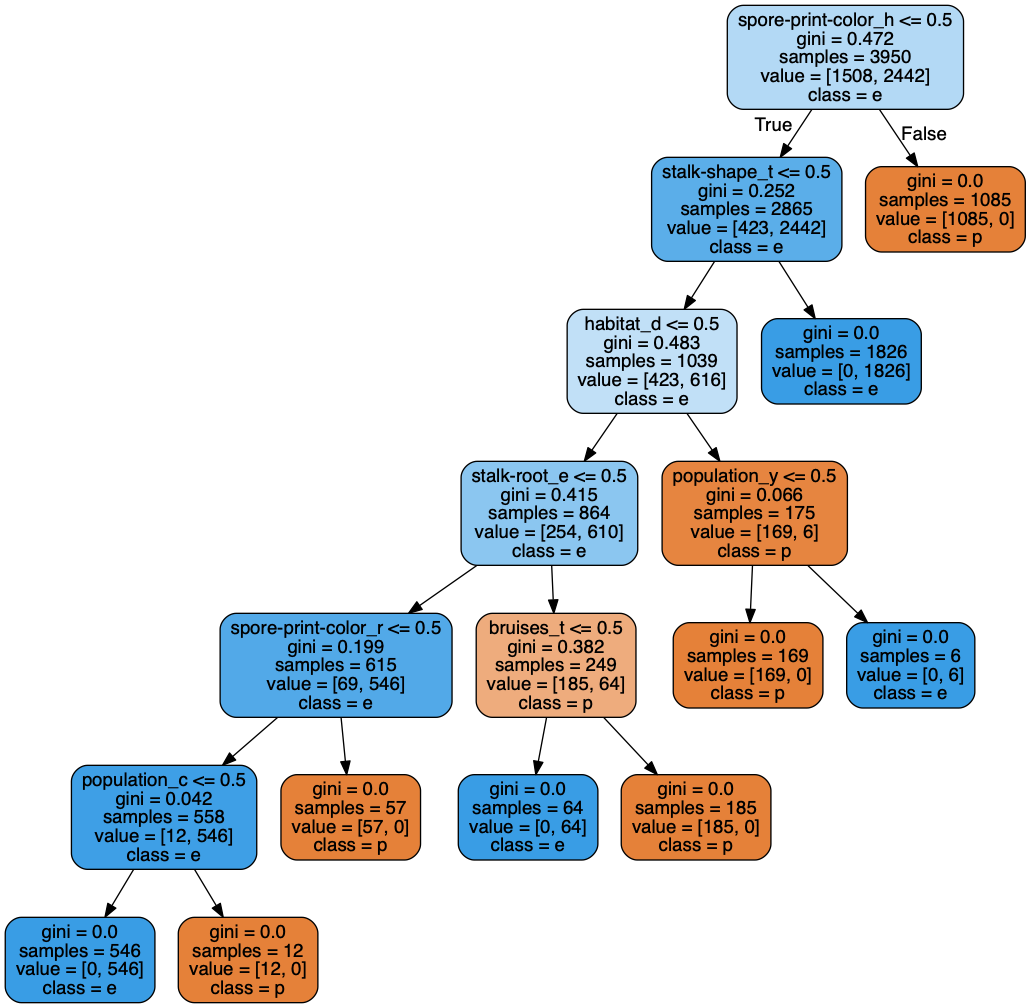

In [164]:
graph = tree_plot(tree, mushrooms_without_NaN) 
Image(graph.create_png())

In this case the abscense of missing values makes the tree simpler, and we also get a perfect score, so this seems the best result for now!

## 4.1.5 Imputing missing values <a name="dt1.5"></a>

In [165]:
X_train, y_train, X_test, y_test = preprocess_around(mushrooms_imputed)
tree = train_and_test(DecisionTreeClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


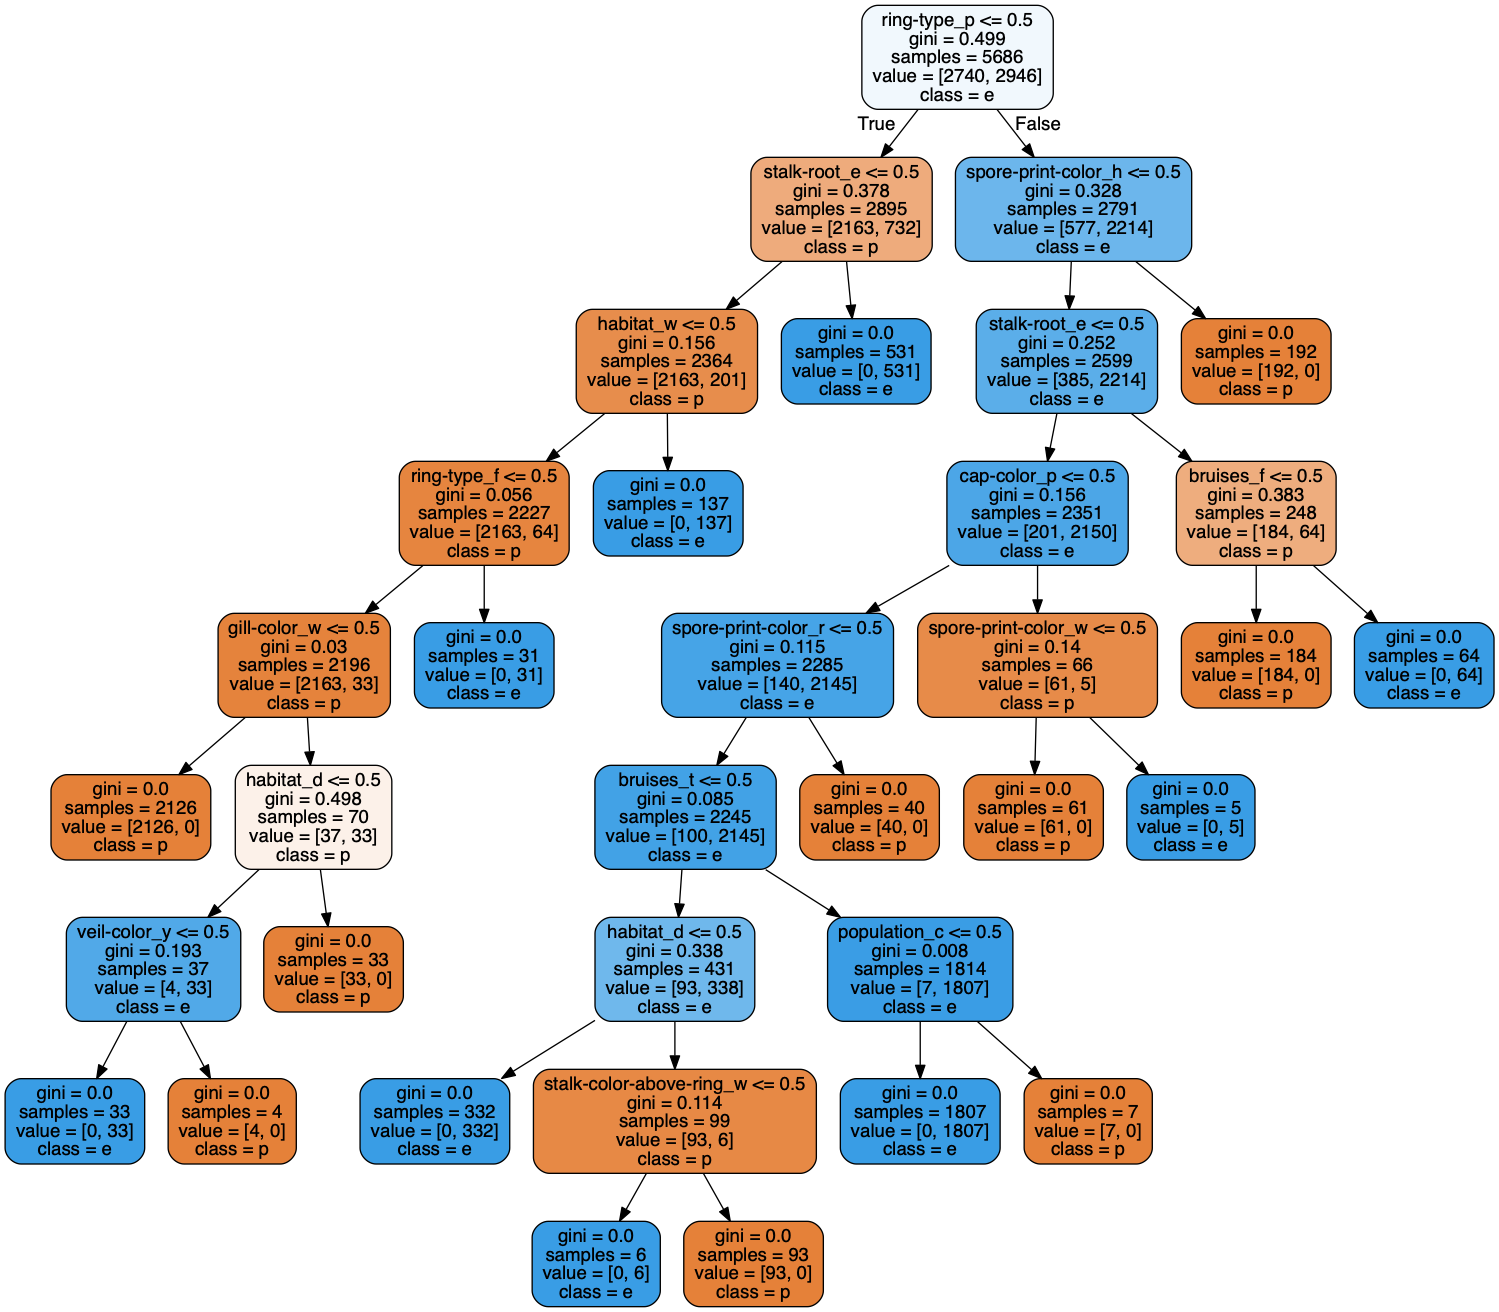

In [166]:
graph = tree_plot(tree, mushrooms_imputed)  
Image(graph.create_png())

By imputing the missing values and using all data with all features, we get a more complex tree, which makes sense, because we have more data but some of them with incorrect values for `stalk-root`, which makes it harder for the model to learn a simple tree.

# 4.2 Random Forest <a name="rf1"></a>

For the rest of the classifiers, let's only use the data without the rows with the missing values, as we have seen that it's the best choice in this case.

In [167]:
from sklearn.ensemble import RandomForestClassifier

In [168]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_without_NaN)
forest = train_and_test(RandomForestClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


Now let's get the [features importances](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/).

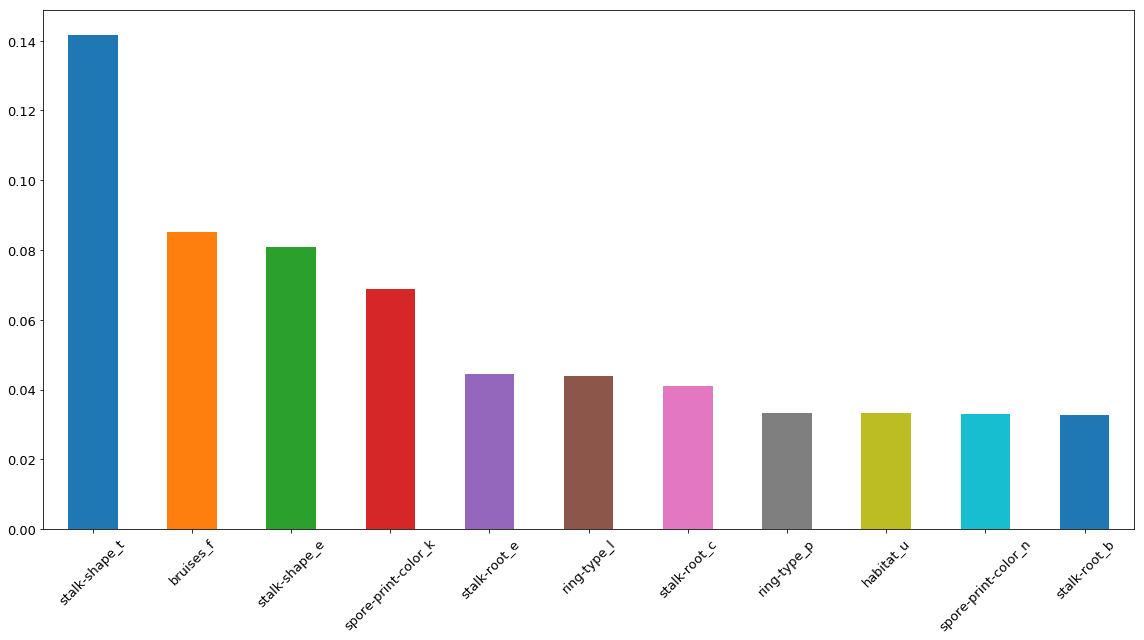

In [169]:
# Gets the importance of each features
importances = forest.feature_importances_
# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, pd.get_dummies(mushrooms_without_NaN.drop(["class"], axis=1)).columns)
# Sort the array in descending order of the importances
f_importances = f_importances.sort_values(ascending=False)
# Get the top 10 most important features
f_importances_top_10 = f_importances.iloc[0:11]
# Draws the bar Plot for the 10 most important features 
f_importances_top_10.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=13)
# Show the plot
plt.tight_layout()
plt.show()

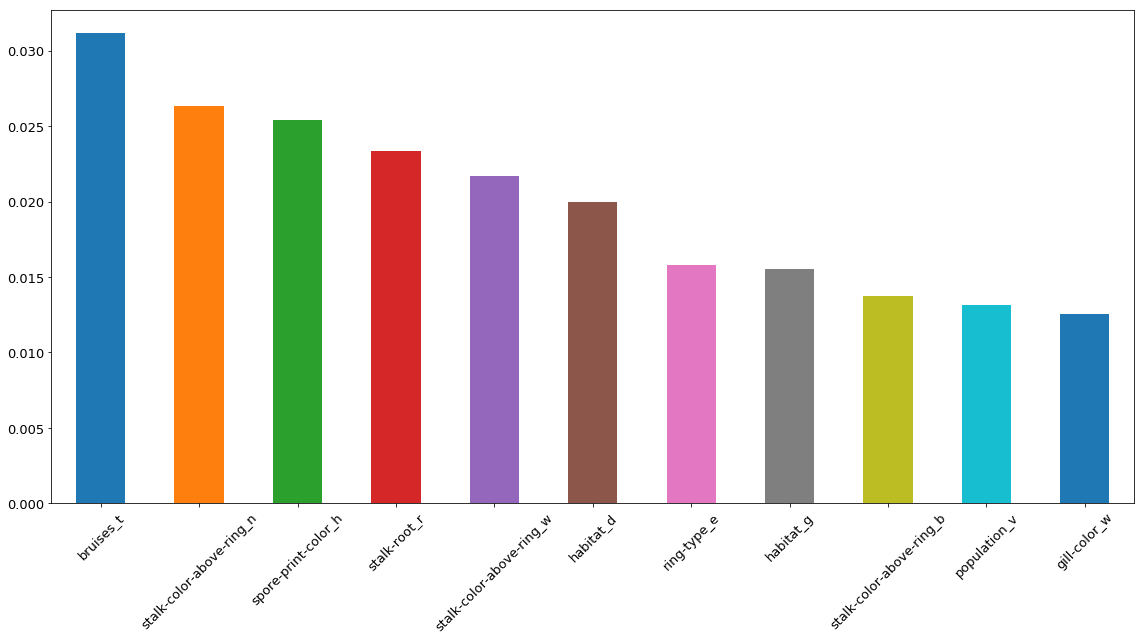

In [170]:
f_importances_top_20 = f_importances.iloc[11:22] 
f_importances_top_20.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45, fontsize=13)
plt.tight_layout()
plt.show()

Let's compute the original features importance by adding up the importances of each of its corresponding dummy variables.

In [171]:
# Names of the dummy variables
features = pd.get_dummies(mushrooms_without_NaN.drop(["class"], axis=1)).columns
# Computes this again because we don't wont it sorted
f_importances = pd.Series(importances, features) 
importa_dict = {}
# For each feature in the original dataframe
for i in mushrooms_without_NaN.drop("class", axis = 1).columns:
    # Assign this feature as key and the sum of the importances of every dummy variable corresponding to it as value
    importa_dict[i] = f_importances[features.str.contains(i)].sum() # Subsets f_importances with the columns containing the name 
    # "i", which is the original feature name, so it gets all the dummy columns "i_..."
feat_importances = pd.Series(importa_dict).sort_values(ascending=False)

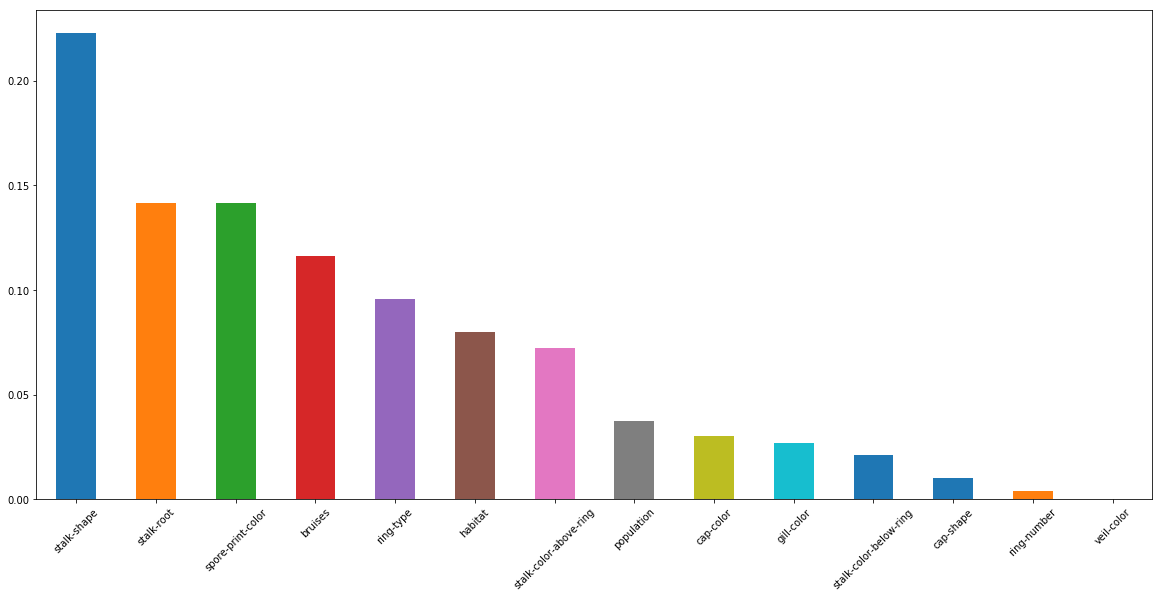

In [172]:
feat_importances.plot(kind='bar', figsize=(20,9), rot=45, fontsize=10)
plt.show()

Comparing with the feature importance ranking obtained through Logistic Regression 

In [204]:
sorted(ranking_original, key=ranking_original.get)

['stalk-shape',
 'stalk-root',
 'veil-color',
 'ring-type',
 'spore-print-color',
 'bruises',
 'stalk-color-below-ring',
 'habitat',
 'cap-color',
 'population',
 'ring-number',
 'stalk-color-above-ring',
 'cap-shape',
 'gill-color']

we have some of them in the same place but others way off. As explained before, Random Forest gives a more reliable result, so let's use this teo see once again, the amount of features we need to get a perfect score.

In [173]:
def rf_score(n_features):
    
    """"
    Returns the score of the random forest using the n_features most important features
    """
    
    # Slices the list of names of features sorted by importance from the most important until n_features
    X = mushrooms_without_NaN[list(feat_importances.index)[0:n_features]]
    X = pd.get_dummies(X).values
    y = mushrooms_without_NaN["class"].values
    le = LabelEncoder()
    y = le.fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)
    forest = RandomForestClassifier(random_state = 0)
    forest.fit(X_train, y_train)
    return forest.score(X_test, y_test)

In [174]:
for i in range(1, len(feat_importances.index)):
    if rf_score(i) == 1:
        print(i)
        break

6


In this case we only need 6 features out of the original 15 easy-to-tell features to get 100% percent accuracy. 

In [175]:
list(feat_importances.index)[0:6]

['stalk-shape',
 'stalk-root',
 'spore-print-color',
 'bruises',
 'ring-type',
 'habitat']

In [176]:
subset = list(feat_importances.index)[0:6]
subset.append("class")
X_train, y_train, X_test, y_test = preprocess(mushrooms_without_NaN[subset])
forest = train_and_test(RandomForestClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


However, we are more interested on a perfect tree than on a perfect forest, so let's do the same for the Decision Tree Classifier.

In [177]:
def dt_score(n_features):
    
    """"
    Returns the score of the random forest using the n_features most important features
    """
    
    # Slices the list of names of features sorted by importance from the most important until n_features
    X = mushrooms_without_NaN[list(feat_importances.index)[0:n_features]]
    X = pd.get_dummies(X).values
    y = mushrooms_without_NaN["class"].values
    le = LabelEncoder()
    y = le.fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)
    tree = DecisionTreeClassifier(random_state = 0)
    tree.fit(X_train, y_train)
    return tree.score(X_test, y_test)

In [178]:
for i in range(1, len(feat_importances.index)):
    if dt_score(i) == 1:
        print(i)
        break

6


In [194]:
subset = list(feat_importances.index)[0:6]
subset.append("class")
X_train, y_train, X_test, y_test = preprocess_around(mushrooms_without_NaN[subset]) 
tree = train_and_test(DecisionTreeClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


Well, we still have a perfect score with the top 6 features. Let's plot this tree.

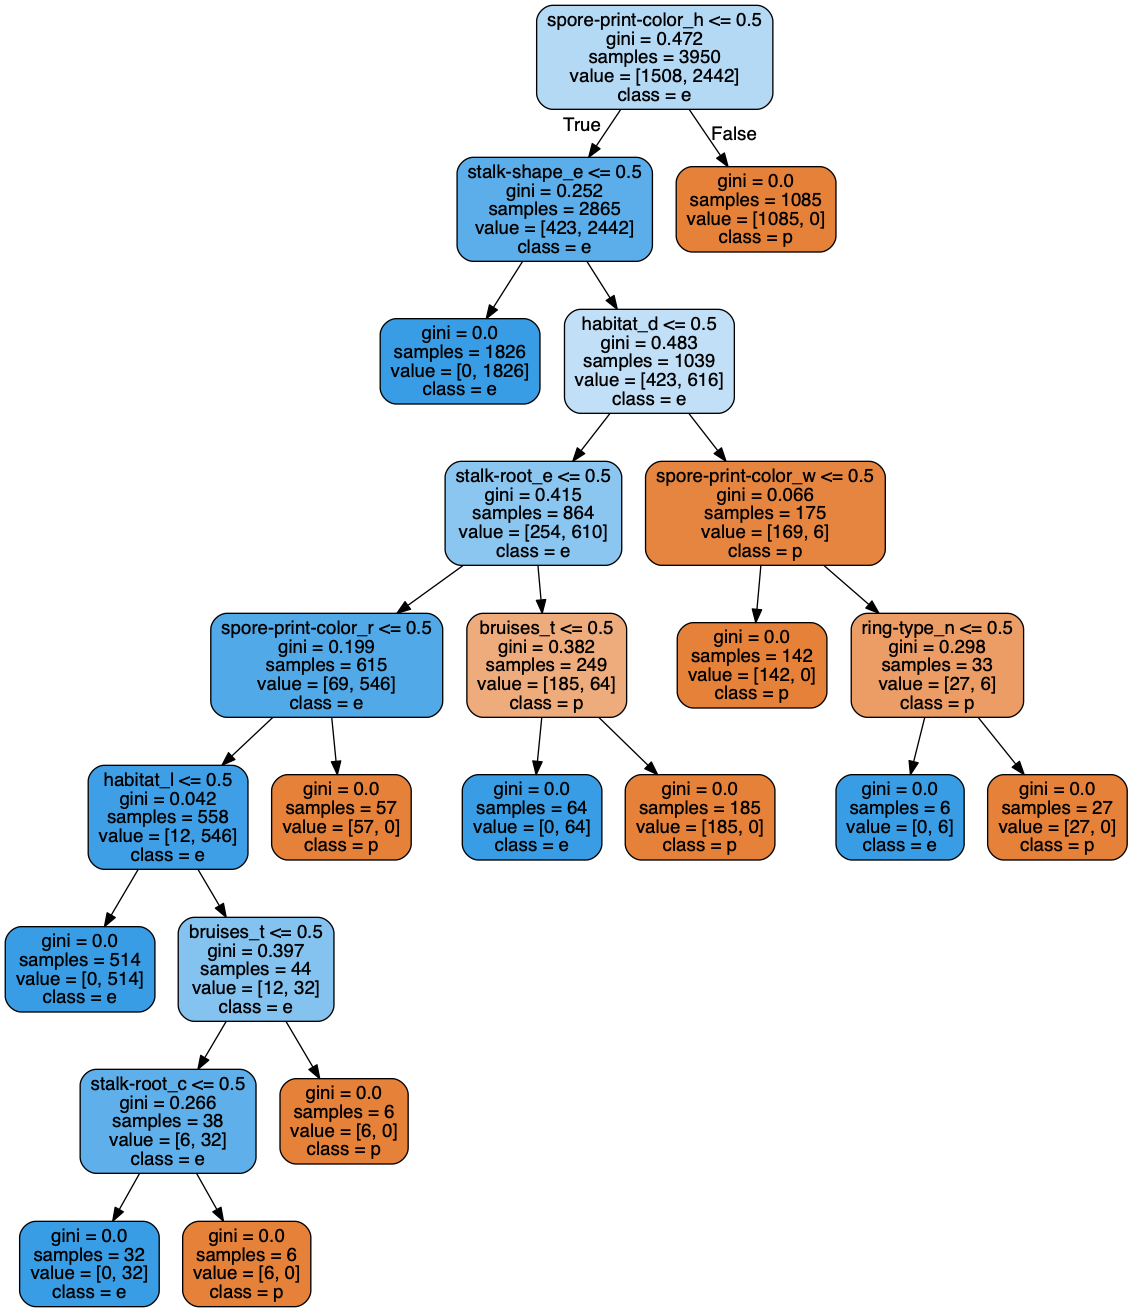

In [195]:
# Plots the tree we just learned
graph = tree_plot(tree, mushrooms_without_NaN[subset])
Image(graph.create_png()) 

We are not getting a simpler tree, which wasn't expected. Maybe it's because we are using the original features and not the dummy variables. Let's use the dummies instead.

In [181]:
X_train, y_train, X_test, y_test = preprocess_around(mushrooms_without_NaN)
forest = train_and_test(RandomForestClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


In [182]:
# Gets the importance of each features
importances = forest.feature_importances_
# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, pd.get_dummies(mushrooms_without_NaN.drop(["class"], axis=1)).columns)
# Sort the array in descending order of the importances
f_importances = f_importances.sort_values(ascending=False)

In [183]:
def dt_score_dummy(n_features):
    
    """"
    Returns the score of the random forest using the n_features most important features
    """
    
    X = pd.get_dummies(mushrooms_without_NaN.drop("class", axis = 1))
    X = X[list(f_importances.index)[0:n_features]].values
    y = mushrooms_without_NaN["class"].values
    le = LabelEncoder()
    y = le.fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)
    tree = DecisionTreeClassifier(random_state = 0)
    tree.fit(X_train, y_train) 
    return tree.score(X_test, y_test)

In [184]:
for i in range(1, len(f_importances.index)):
    if dt_score_dummy(i) == 1:
        print(i)
        break

22


In [199]:
X = pd.get_dummies(mushrooms_without_NaN.drop("class", axis = 1))
X = X[list(f_importances.index)[0:22]].values
y = mushrooms_without_NaN["class"].values
le = LabelEncoder()
y = le.fit_transform(y)
y_around = [] 
for i in range(len(y)):
    if y[i] == 0:
        y_around.append(1)
    else:
        y_around.append(0)
y_around = np.array(y_around)
X_train, X_test, y_train, y_test = train_test_split(X, y_around, test_size = 0.3, random_state = 0, stratify = y)
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

1.0

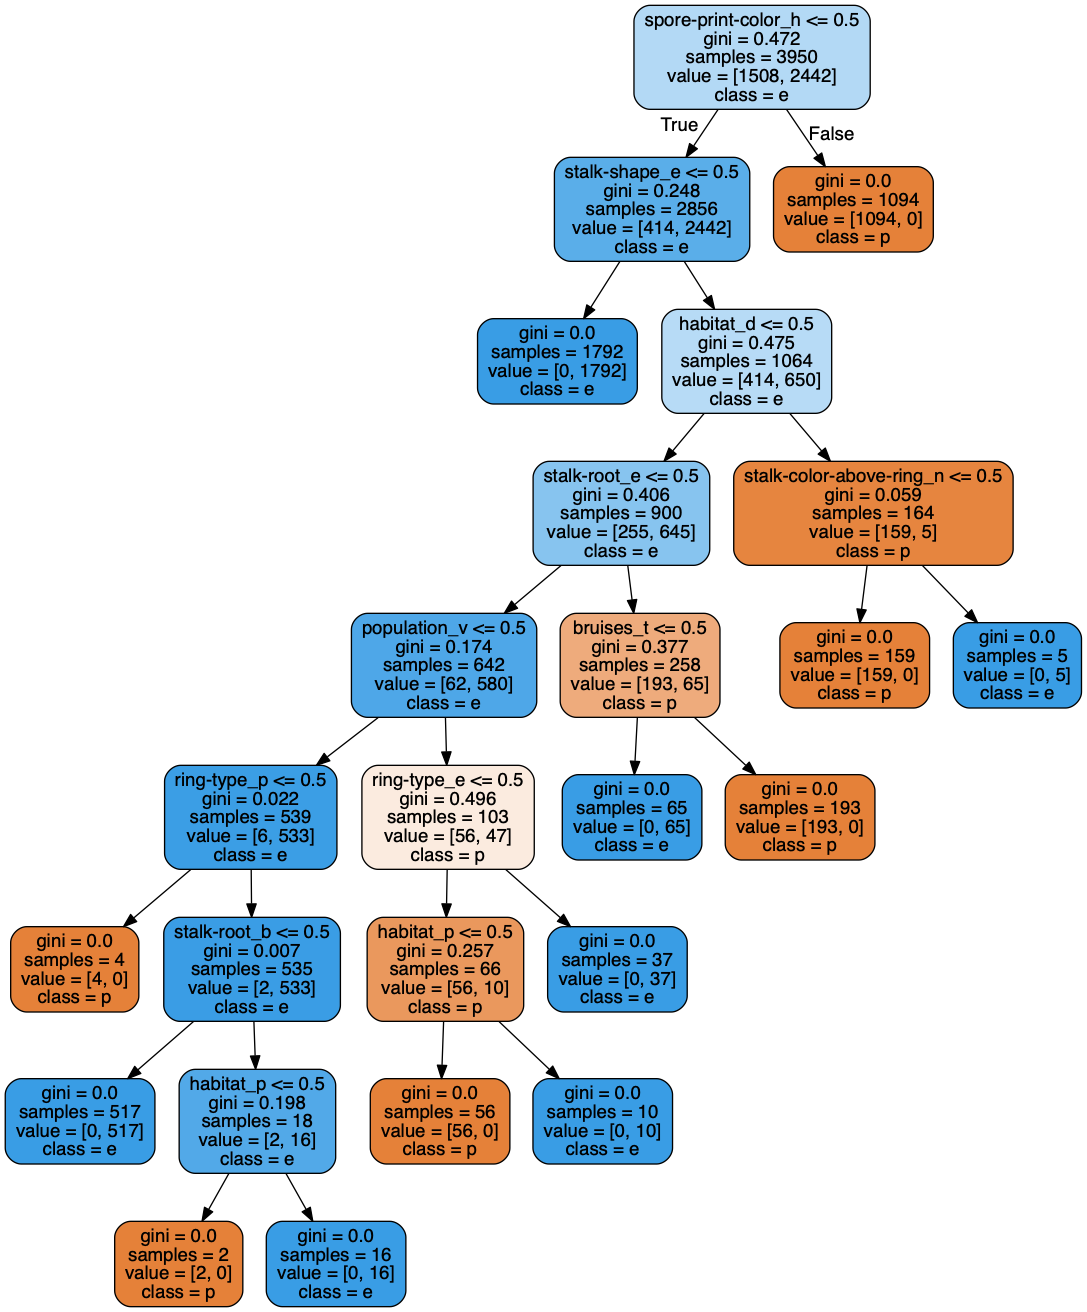

In [200]:
# Plots the tree we just learned
dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=['p', # p comes firts because it is assigned a 0 by the LabelEncoder (when we use preprocess_around)
                                        'e'],
                           feature_names=f_importances.index[0:22],
                           out_file=None) 

Image(graph_from_dot_data(dot_data).create_png()) 

We are still not getting a better tree... let's use the ranked features from the Logistic Regression.

In [205]:
features_ranked = sorted(ranking_original, key=ranking_original.get) 

In [214]:
def dt_score_(n_features):
    
    """"
    Returns the score of the random forest using the n_features most important features
    """
    
    # Slices the list of names of features sorted by importance from the most important until n_features
    X = mushrooms_without_NaN[features_ranked[0:n_features]]
    X = pd.get_dummies(X).values
    y = mushrooms_without_NaN["class"].values
    le = LabelEncoder()
    y = le.fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)
    tree = DecisionTreeClassifier(random_state = 0)
    tree.fit(X_train, y_train)
    return tree.score(X_test, y_test)

In [215]:
for i in range(1, len(features_ranked)):
    if dt_score_(i) == 1:
        print(i)
        break

8


In [216]:
features_ranked[0:8] 

['stalk-shape',
 'stalk-root',
 'veil-color',
 'ring-type',
 'spore-print-color',
 'bruises',
 'stalk-color-below-ring',
 'habitat']

In [237]:
subset = features_ranked[0:8] 
subset.append("class")
X_train, y_train, X_test, y_test = preprocess_around(mushrooms_without_NaN[subset]) 
tree = train_and_test(DecisionTreeClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


Well, we still have a perfect score with the top 6 features. Let's plot this tree.

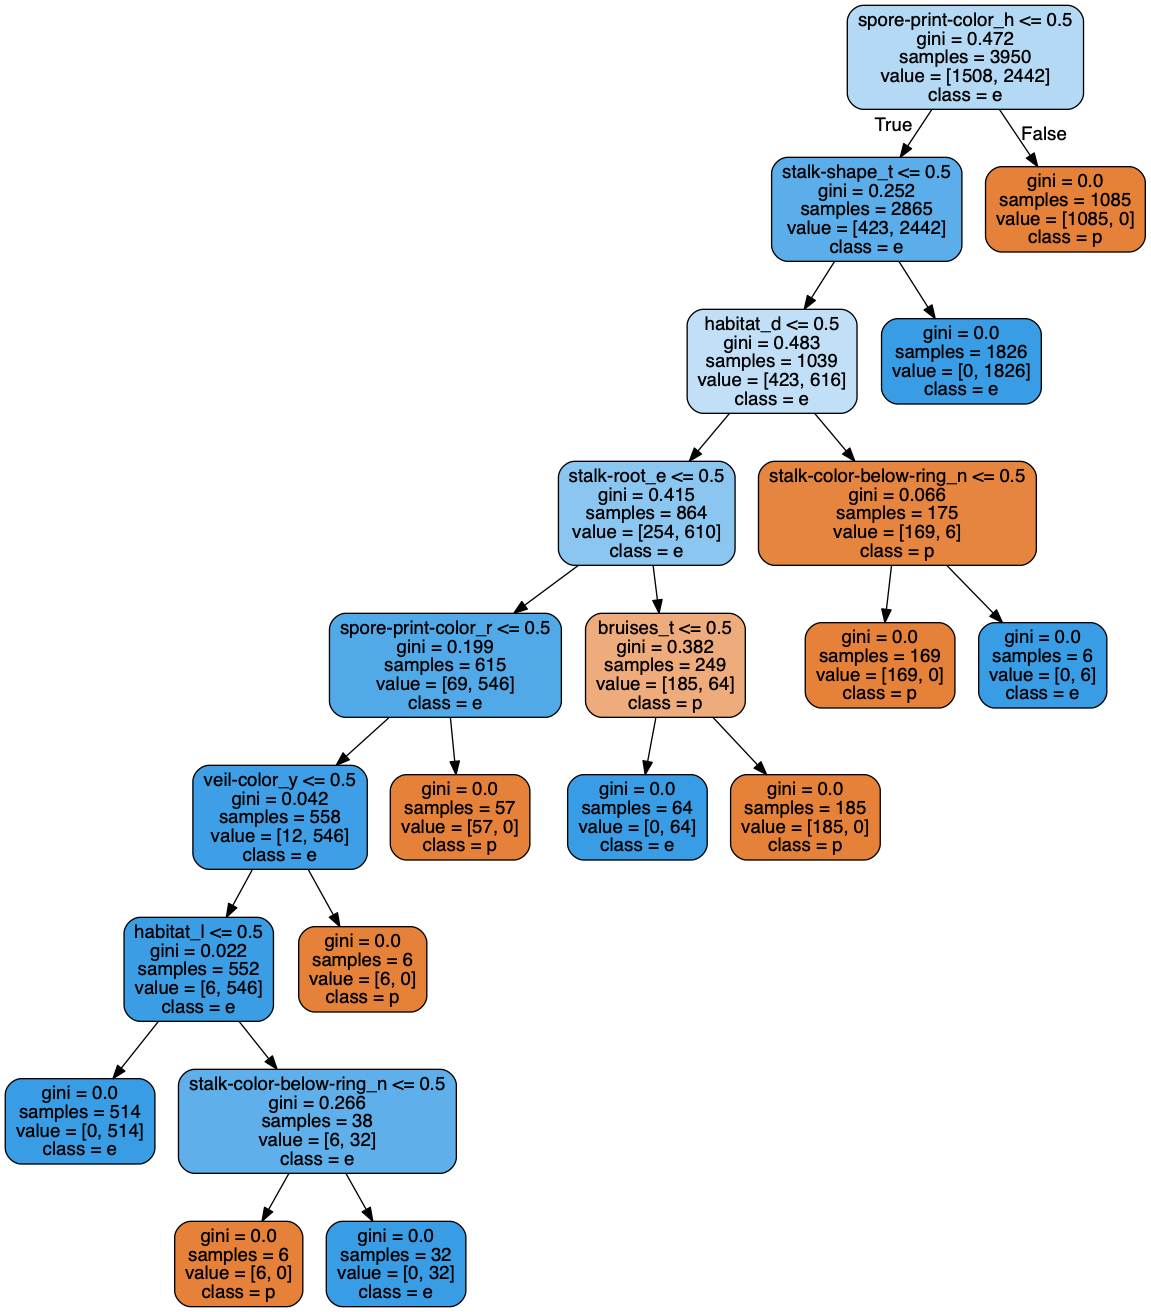

In [218]:
# Plots the tree we just learned
graph = tree_plot(tree, mushrooms_without_NaN[subset])
Image(graph.create_png()) 

We also get a similar result using the most relevant features from Logistic Regression, which is a bit more complex than the tree we obtained using all the easy-to-tell features:

In [235]:
X_train, y_train, X_test, y_test = preprocess_around(mushrooms_without_NaN)
tree = train_and_test(DecisionTreeClassifier(random_state = 0), [X_train, y_train], [X_test, y_test])

1.0


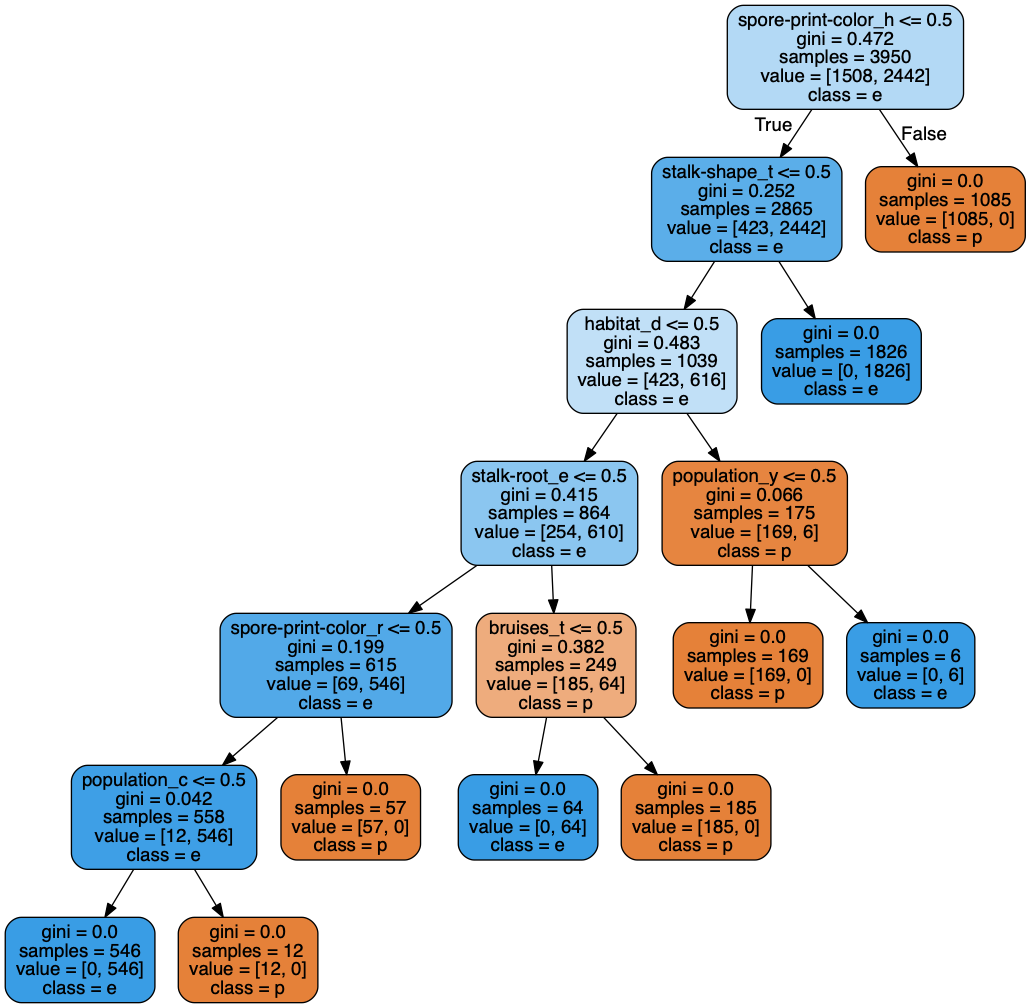

In [236]:
graph = tree_plot(tree, mushrooms_without_NaN) 
Image(graph.create_png())

Thus, our feature importance is only useful to inform the mushroom hunters about them, but the actual simpler tree uses `spore print color`, `stalk shape`, `habitat`, `stalk root`, `population` and`bruises`, out of which 5 of them are on the top on Random Forest and they are also ranked high on Logistic Regression, but it does seems that Random Forest works better.

In [225]:
# Prints the features ranked by importance by Logistic Regression
features_ranked

['stalk-shape',
 'stalk-root',
 'veil-color',
 'ring-type',
 'spore-print-color',
 'bruises',
 'stalk-color-below-ring',
 'habitat',
 'cap-color',
 'population',
 'ring-number',
 'stalk-color-above-ring',
 'cap-shape',
 'gill-color']

In [226]:
# Prints the features ranked by importance by Random Forest
feat_importances

stalk-shape               0.222607
stalk-root                0.141749
spore-print-color         0.141567
bruises                   0.116209
ring-type                 0.095569
habitat                   0.080052
stalk-color-above-ring    0.072190
population                0.037214
cap-color                 0.030511
gill-color                0.027106
stalk-color-below-ring    0.021069
cap-shape                 0.010066
ring-number               0.003775
veil-color                0.000317
dtype: float64

# TODO: Try the scoring_custom_try approach but without grid search? (only cross-val?)

# 5. Support Vector Machine <a name="svm1"></a>

In [75]:
from sklearn.svm import SVC

In [279]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_without_NaN) 
svm = train_and_test(SVC(random_state = 0), [X_train, y_train], [X_test, y_test])

0.9929119905493208


Once again, we don't get a perfect score right away. Let's tune the hyperparameters.

In [280]:
pipe = Pipeline([('clf', SVC(random_state = 0))])

In [281]:
param_grid = [{'clf__C': [0.01, 0.1, 1, 10, 100],
               'clf__gamma': [0.01, 0.1, 1, 10, 100],
               'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}]

The reason support vector machines are so slow is because when using non-linear kernels, the complexity is approximately $\alpha$ `(n_samples^2 * n_features)`. [Source](https://stackoverflow.com/questions/40077432/scikit-learn-svm-svc-is-extremely-slow).

In [282]:
#import time
#start = time.time()
#gs = GridSearchCV(estimator=pipe,
#                      param_grid=param_grid,
#                      scoring='accuracy',
#                      cv=StratifiedKFold(n_splits=10,
#                                         shuffle=True,
#                                         random_state=0)) 
# Fit the pipeline
#gs = gs.fit(X_train, y_train)
    
# Update best_score_param_estimators
#print(gs.best_score_, gs.best_params_, gs.best_estimator_)
#print(time.time() - start) 

# Output:

#1.0 {'clf__C': 0.01, 'clf__gamma': 1, 'clf__kernel': 'poly'} Pipeline(memory=None,
#     steps=[('clf', SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
#  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
#  max_iter=-1, probability=False, random_state=0, shrinking=True,
#  tol=0.001, verbose=False))])
#979.3182301521301

1.0 {'clf__C': 0.01, 'clf__gamma': 1, 'clf__kernel': 'poly'} Pipeline(memory=None,
     steps=[('clf', SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False))])
979.3182301521301


Indeed, the time it took now was 979.3182301521301 seconds, while when using all the features was 3607.864349126816 seconds.

# TODO: Do some math to see if this follows the formula above

In [283]:
svm = train_and_test(SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False),
                     [X_train, y_train], [X_test, y_test])

1.0


# 6. K-Nearest Neighbors <a name="knn1"></a>

In [284]:
from sklearn.neighbors import KNeighborsClassifier

In [293]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_without_NaN)
knn = train_and_test(KNeighborsClassifier(), [X_train, y_train], [X_test, y_test])

0.9982279976373302


In [294]:
pipe = Pipeline([('clf', KNeighborsClassifier())])

In [295]:
param_grid = {'clf__n_neighbors': [1,3,5,7,9],
               'clf__algorithm': ["auto", "ball_tree", "kd_tree", "brute"],
             "clf__p": [1,2]}

The reason support vector machines are so slow is because when using non-linear kernels, the complexity is approximately $\alpha$ `(n_samples^2 * n_features)`. [Source](https://stackoverflow.com/questions/40077432/scikit-learn-svm-svc-is-extremely-slow).

In [296]:
#import time
#start = time.time()
#gs = GridSearchCV(estimator=pipe,
#                      param_grid=param_grid,
#                      scoring='accuracy',
#                      cv=StratifiedKFold(n_splits=10,
#                                         shuffle=True,
#                                         random_state=0)) 
# Fit the pipeline
#gs = gs.fit(X_train, y_train)
    
# Update best_score_param_estimators
#print(gs.best_score_, gs.best_params_, gs.best_estimator_)
#print(time.time() - start) 

# Output:

#0.999493670886076 {'clf__algorithm': 'auto', 'clf__n_neighbors': 5, 'clf__p': 1} Pipeline(memory=None,
#     steps=[('clf', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
#           metric_params=None, n_jobs=None, n_neighbors=5, p=1,
#           weights='uniform'))])
#406.7599630355835

0.999493670886076 {'clf__algorithm': 'auto', 'clf__n_neighbors': 5, 'clf__p': 1} Pipeline(memory=None,
     steps=[('clf', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=1,
           weights='uniform'))])
406.7599630355835


# TODO: Do confusion matrix, get minimum falso positives and comment this

# 7. Naive Bayes <a name="NB1"></a>

In [297]:
from sklearn.naive_bayes import GaussianNB

In [298]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_without_NaN)
svm = train_and_test(GaussianNB(), [X_train, y_train], [X_test, y_test])

0.9338452451269935


In [299]:
pipe = Pipeline([('clf', GaussianNB())])

param_grid = {'clf__priors': [None],
               'clf__var_smoothing': [1e-9]}

gs = GridSearchCV(estimator=pipe,
                      param_grid=param_grid,
                      scoring='accuracy',
                      cv=StratifiedKFold(n_splits=10,
                                         shuffle=True,
                                         random_state=0)) 
# Fit the pipeline
gs = gs.fit(X_train, y_train)
    
# Update best_score_param_estimators
print(gs.best_score_, gs.best_params_, gs.best_estimator_)

gs.best_estimator_.score(X_test, y_test)

0.9253164556962026 {'clf__priors': None, 'clf__var_smoothing': 1e-09} Pipeline(memory=None,
     steps=[('clf', GaussianNB(priors=None, var_smoothing=1e-09))])


0.9338452451269935

# TODO: Do confusion matrix, get minimum falso positives and comment this

# 8. Clustering <a name="cluster1"></a>

In [301]:
from sklearn.cluster import KMeans

In [302]:
X_train, y_train, X_test, y_test = preprocess(mushrooms_without_NaN) 
# Gets the indexes of the unique class labels
classes, indices = np.unique(y_train, return_index=True)
# Removes lables from y_train minus two unique ones
y_train = np.array([y_train[i] if i in indices else -1 for i in range(y_train.shape[0])])

In [304]:
km = KMeans(n_clusters=2, random_state=0)   
# Computes the clusters for the training data
y_train_pred = km.fit_predict(X_train)
# Gets the map of the clusters indexes to the original labels
dict_ = {}
#for i in range(y_train.shape[0]):
#    if y_train[i] != -1:
#        key = y_train_pred[i]
#        val = y_train[i]
#        dict_[key] = val
dict_[0] = 0
dict_[1] = 1
# Uses the clustering on the testing data
y_test_pred = km.predict(X_test)
# And the map to get back the original labels
y_test_pred = np.array([dict_[key] for key in y_test_pred])
# Computes the accuracy comparing with the real labels
from sklearn.metrics import precision_recall_fscore_support
print('Accuracy:', end=' ')
print(precision_recall_fscore_support(y_test_pred, y_test, average='micro')[0])

Accuracy: 0.854695806261075


# TODO: Comment and Hyperparameter tune this

# TODO: Conclusions